# Imports

In [4889]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
import pickle

# Load data and copy dataframe

In [4890]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

initial_df = pd.read_csv('data/house_rent_data.csv')
df = initial_df.copy()

In [4891]:
df.head()

,Unnamed: 0,Ціна,"Локація (Місто, Район)",Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Домашні улюбленці,Автономність при блекауті
0,0,10 000 грн.,"Дніпро, Центральний - Сьогодні о 16:44",2.0,3.0,28 м²,15 м²,1 кімната,З меблями,Житловий стан,"Так, котик 😸, Так, маленький песик(до 10 кг) 🐕","Працює інтернет, Працює водопопостачання, Прац..."
1,1,17 000 грн.,"Київ, Голосіївський - Сьогодні о 13:03",16.0,20.0,52 м²,12 м²,1 кімната,З меблями,Євроремонт,Ні 🥺,NaN
2,2,15 000 грн.,"Запоріжжя, Вознесенівський - Сьогодні о 11:28",11.0,12.0,60 м²,15 м²,2 кімнати,З меблями,Євроремонт,Ні 🥺,NaN
3,3,7 000 грн.,"Харків, Київський - Сьогодні о 23:07",3.0,5.0,47.50 м²,5 м²,2 кімнати,З меблями,NaN,"Так, великий песик 🐶, Так, котик 😸",NaN
4,4,7 500 грн.,Рівне - Сьогодні о 23:06,3.0,5.0,37 м²,7 м²,1 кімната,З меблями,NaN,NaN,"Працює опалення, Працює водопопостачання"


In [4892]:
df.shape

(1270, 12)

In [4893]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1270 non-null   int64  
 1   Ціна                       1270 non-null   object 
 2   Локація (Місто, Район)     1270 non-null   object 
 3   Поверх                     1223 non-null   float64
 4   Поверховість               1223 non-null   float64
 5   Загальна площа             1223 non-null   object 
 6   Площа кухні                1223 non-null   object 
 7   Кількість кімнат           1223 non-null   object 
 8   Меблювання                 1036 non-null   object 
 9   Ремонт                     939 non-null    object 
 10  Домашні улюбленці          554 non-null    object 
 11  Автономність при блекауті  295 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 119.2+ KB


# Remove unimportant column

In [4894]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Ціна,"Локація (Місто, Район)",Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Домашні улюбленці,Автономність при блекауті
0,10 000 грн.,"Дніпро, Центральний - Сьогодні о 16:44",2.0,3.0,28 м²,15 м²,1 кімната,З меблями,Житловий стан,"Так, котик 😸, Так, маленький песик(до 10 кг) 🐕","Працює інтернет, Працює водопопостачання, Прац..."
1,17 000 грн.,"Київ, Голосіївський - Сьогодні о 13:03",16.0,20.0,52 м²,12 м²,1 кімната,З меблями,Євроремонт,Ні 🥺,NaN
2,15 000 грн.,"Запоріжжя, Вознесенівський - Сьогодні о 11:28",11.0,12.0,60 м²,15 м²,2 кімнати,З меблями,Євроремонт,Ні 🥺,NaN
3,7 000 грн.,"Харків, Київський - Сьогодні о 23:07",3.0,5.0,47.50 м²,5 м²,2 кімнати,З меблями,NaN,"Так, великий песик 🐶, Так, котик 😸",NaN
4,7 500 грн.,Рівне - Сьогодні о 23:06,3.0,5.0,37 м²,7 м²,1 кімната,З меблями,NaN,NaN,"Працює опалення, Працює водопопостачання"


# Check and remove duplicates

In [4895]:
df.duplicated().sum()

45

In [4896]:
df.drop_duplicates(inplace=True)

In [4897]:
df.shape

(1225, 11)

# Check null values

In [4898]:
df.isnull().sum()

Ціна                           0
Локація (Місто, Район)         0
Поверх                        47
Поверховість                  47
Загальна площа                47
Площа кухні                   47
Кількість кімнат              47
Меблювання                   228
Ремонт                       321
Домашні улюбленці            691
Автономність при блекауті    939
dtype: int64

In [4899]:
df['null_counts'] = df.isnull().sum(axis=1)
df.head()

,Ціна,"Локація (Місто, Район)",Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Домашні улюбленці,Автономність при блекауті,null_counts
0,10 000 грн.,"Дніпро, Центральний - Сьогодні о 16:44",2.0,3.0,28 м²,15 м²,1 кімната,З меблями,Житловий стан,"Так, котик 😸, Так, маленький песик(до 10 кг) 🐕","Працює інтернет, Працює водопопостачання, Прац...",0
1,17 000 грн.,"Київ, Голосіївський - Сьогодні о 13:03",16.0,20.0,52 м²,12 м²,1 кімната,З меблями,Євроремонт,Ні 🥺,NaN,1
2,15 000 грн.,"Запоріжжя, Вознесенівський - Сьогодні о 11:28",11.0,12.0,60 м²,15 м²,2 кімнати,З меблями,Євроремонт,Ні 🥺,NaN,1
3,7 000 грн.,"Харків, Київський - Сьогодні о 23:07",3.0,5.0,47.50 м²,5 м²,2 кімнати,З меблями,NaN,"Так, великий песик 🐶, Так, котик 😸",NaN,2
4,7 500 грн.,Рівне - Сьогодні о 23:06,3.0,5.0,37 м²,7 м²,1 кімната,З меблями,NaN,NaN,"Працює опалення, Працює водопопостачання",2


In [4900]:
for i in range(1, df['null_counts'].max() + 1):
    print("null_counts > %s = %s" % (i, len(df[df['null_counts'] > i])))

null_counts > 1 = 691
null_counts > 2 = 283
null_counts > 3 = 133
null_counts > 4 = 47
null_counts > 5 = 47
null_counts > 6 = 47
null_counts > 7 = 47
null_counts > 8 = 47
null_counts > 9 = 0


# Delete 47 rows in which most columns are null

In [4901]:
df.drop(df[df['null_counts'] > 4].index, axis=0, inplace=True)
df.shape

(1178, 12)

In [4902]:
df.drop(columns=['null_counts'], inplace=True)
df.shape

(1178, 11)

# Remove currency and convert prices to float

In [4903]:
df['Ціна'].str.contains('грн.').sum()

1178

In [4904]:
df['Ціна'].str.contains('span').sum()

124

In [4905]:
df['Ціна'] = df['Ціна'].str.split('грн.', expand=True)[0]
df['Ціна'] = df['Ціна'].str.replace(r'\s+', '', regex=True)
df['Ціна'] = df['Ціна'].astype('float32')

In [4906]:
df.head()

,Ціна,"Локація (Місто, Район)",Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Домашні улюбленці,Автономність при блекауті
0,10000.0,"Дніпро, Центральний - Сьогодні о 16:44",2.0,3.0,28 м²,15 м²,1 кімната,З меблями,Житловий стан,"Так, котик 😸, Так, маленький песик(до 10 кг) 🐕","Працює інтернет, Працює водопопостачання, Прац..."
1,17000.0,"Київ, Голосіївський - Сьогодні о 13:03",16.0,20.0,52 м²,12 м²,1 кімната,З меблями,Євроремонт,Ні 🥺,NaN
2,15000.0,"Запоріжжя, Вознесенівський - Сьогодні о 11:28",11.0,12.0,60 м²,15 м²,2 кімнати,З меблями,Євроремонт,Ні 🥺,NaN
3,7000.0,"Харків, Київський - Сьогодні о 23:07",3.0,5.0,47.50 м²,5 м²,2 кімнати,З меблями,NaN,"Так, великий песик 🐶, Так, котик 😸",NaN
4,7500.0,Рівне - Сьогодні о 23:06,3.0,5.0,37 м²,7 м²,1 кімната,З меблями,NaN,NaN,"Працює опалення, Працює водопопостачання"


In [4907]:
df['Ціна'].describe()

count      1178.000000
mean      17579.175781
std       28833.673828
min        1000.000000
25%        7000.000000
50%       11000.000000
75%       17000.000000
max      405787.000000
Name: Ціна, dtype: float64

# Check and remove outliers in the price column

In [4908]:
sorted_df_by_price = df.sort_values(by=['Ціна'])
low_prices = sorted_df_by_price['Ціна'].head(10)
high_prices = sorted_df_by_price['Ціна'].tail(20)
print('outer range (low) of the distribution:')
print(low_prices)
print('\nouter range (high) of the distribution:')
print(high_prices)

outer range (low) of the distribution:
624     1000.0
371     1500.0
250     1999.0
327     2000.0
173     2000.0
390     2000.0
850     2000.0
269     2000.0
1017    2000.0
319     2000.0
Name: Ціна, dtype: float32

outer range (high) of the distribution:
298     101447.0
153     101447.0
1013    105505.0
1066    105505.0
674     121736.0
467     133910.0
1038    154199.0
688     158257.0
829     202894.0
1024    202894.0
1086    202894.0
937     202894.0
182     202894.0
1052    223183.0
1254    243432.0
982     243472.0
985     263559.0
932     263559.0
274     304340.0
715     405787.0
Name: Ціна, dtype: float32


In [4909]:
price_scaled = StandardScaler().fit_transform(np.array(df['Ціна'])[:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.57523775]
 [-0.5578895 ]
 [-0.540576  ]
 [-0.5405413 ]
 [-0.5405413 ]
 [-0.5405413 ]
 [-0.5405413 ]
 [-0.5405413 ]
 [-0.5405413 ]
 [-0.5405413 ]]

outer range (high) of the distribution:
[[ 2.9099119]
 [ 2.9099119]
 [ 3.05071  ]
 [ 3.05071  ]
 [ 3.6138673]
 [ 4.036261 ]
 [ 4.7402163]
 [ 4.8810143]
 [ 6.4297576]
 [ 6.4297576]
 [ 6.4297576]
 [ 6.4297576]
 [ 6.4297576]
 [ 7.1337132]
 [ 7.8362803]
 [ 7.8376684]
 [ 8.534615 ]
 [ 8.534615 ]
 [ 9.949569 ]
 [13.469415 ]]


In [4910]:
df = df[df['Ціна'] < 100000.0]
df.shape

(1155, 11)

# Check price distribution

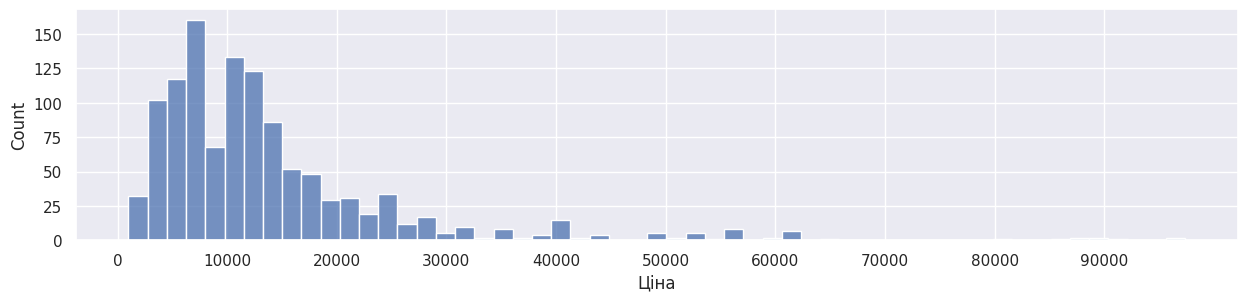

In [4911]:
plt.figure(figsize=(15, 3))
sns.histplot(df['Ціна'])
plt.xticks(np.arange(0, df['Ціна'].max(), 10000))
plt.show()

# Convert City/District column to 2 separate columns with city and district

In [4912]:
df['Локація (Місто, Район)'].str.contains(' - ').sum()

1155

In [4913]:
df['Локація (Місто, Район)'].str.contains(', ').sum()

779

In [4914]:
def convert_district(row):
    city = row['Місто']
    district = row['Район']
    if city and district:
        return district + ' ({city})'.format(city=city)
    return district

In [4915]:
df[['Місто', 'Район']] = df['Локація (Місто, Район)'].str.split(' - ', expand=True)[0].str.split(', ', expand=True)
df['Місто'] = df['Місто'].str.replace('<!-- -->', '')
df['Район'] = df['Район'].str.replace('<!-- -->', '')
df['Район'] = df.apply(convert_district, axis=1)
df.sample(10)

,Ціна,"Локація (Місто, Район)",Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Домашні улюбленці,Автономність при блекауті,Місто,Район
344,4000.0,"Харків, Немишлянський - Сьогодні о 21:10",2.0,2.0,32 м²,5 м²,1 кімната,З меблями,Євроремонт,Ні 🥺,NaN,Харків,Немишлянський (Харків)
1153,3500.0,"Одеса, Пересипський - 07 липня 2024 р.",2.0,9.0,34 м²,7 м²,1 кімната,NaN,NaN,NaN,NaN,Одеса,Пересипський (Одеса)
541,28405.0,"Київ, Солом'янський - 07 липня 2024 р.",8.0,26.0,41 м²,16 м²,1 кімната,З меблями,Авторський проект,Ні 🥺,"Працює інтернет, Працює водопопостачання",Київ,Солом'янський (Київ)
1064,6000.0,"Харків, Салтівський - 07 липня 2024 р.",3.0,9.0,47 м²,7 м²,2 кімнати,З меблями,Авторський проект,"Так, маленький песик(до 10 кг) 🐕","Працює інтернет, Працює ліфт, Працює водопопос...",Харків,Салтівський (Харків)
1100,13000.0,Мукачево<!-- --> - <!-- -->07 липня 2024 р.,6.0,6.0,56 м²,12 м²,2 кімнати,З меблями,Євроремонт,NaN,NaN,Мукачево,None
987,15000.0,Луцьк<!-- --> - <!-- -->07 липня 2024 р.,1.0,10.0,72 м²,14 м²,2 кімнати,З меблями,Євроремонт,Ні 🥺,NaN,Луцьк,None
1085,15000.0,Костянтинівка - 07 липня 2024 р.,5.0,9.0,75 м²,15 м²,3 кімнати,З меблями,Євроремонт,NaN,Працює водопопостачання,Костянтинівка,None
1075,24307.0,Ужгород - 07 липня 2024 р.,4.0,9.0,35 м²,15 м²,1 кімната,З меблями,Авторський проект,Ні 🥺,NaN,Ужгород,None
143,5999.0,"Запоріжжя, Вознесенівський - 04 липня 2024 р.",5.0,5.0,52 м²,7 м²,2 кімнати,З меблями,Косметичний ремонт,NaN,NaN,Запоріжжя,Вознесенівський (Запоріжжя)
903,9000.0,"Харків, Індустріальний - 07 липня 2024 р.",4.0,9.0,68 м²,9 м²,2 кімнати,З меблями,Євроремонт,NaN,NaN,Харків,Індустріальний (Харків)


# Replace rarely seen cities with 'other'

In [4916]:
cities_value_counts = df['Місто'].value_counts()

In [4917]:
cities_value_counts.count()

94

In [4918]:
cities_value_counts[cities_value_counts < 3].count()

50

In [4919]:
cities_value_counts_less_than_3 = cities_value_counts[cities_value_counts < 3]
df['Місто'] = df['Місто'].apply(lambda x: 'Інше' if x in cities_value_counts_less_than_3 else x)
df['Місто'].value_counts()

Місто
Київ                     170
Одеса                    166
Харків                   146
Дніпро                    91
Львів                     88
Інше                      64
Запоріжжя                 38
Ужгород                   37
Миколаїв                  35
Івано-Франківськ          33
Хмельницький              21
Чернівці                  20
Рівне                     18
Тернопіль                 15
Кривий Ріг                13
Софіївська Борщагівка     13
Житомир                   12
Луцьк                     11
Кропивницький             11
Полтава                   10
Ірпінь                     9
Кам'янське                 9
Суми                       9
Вінниця                    9
Костянтинівка              9
Черкаси                    8
Краматорськ                8
Кременчук                  6
Інженерний                 6
Вишневе                    6
Кам'янець-Подільський      6
Бровари                    6
Бориспіль                  5
Херсон                     5
Умань   

# Check average rent prices by city

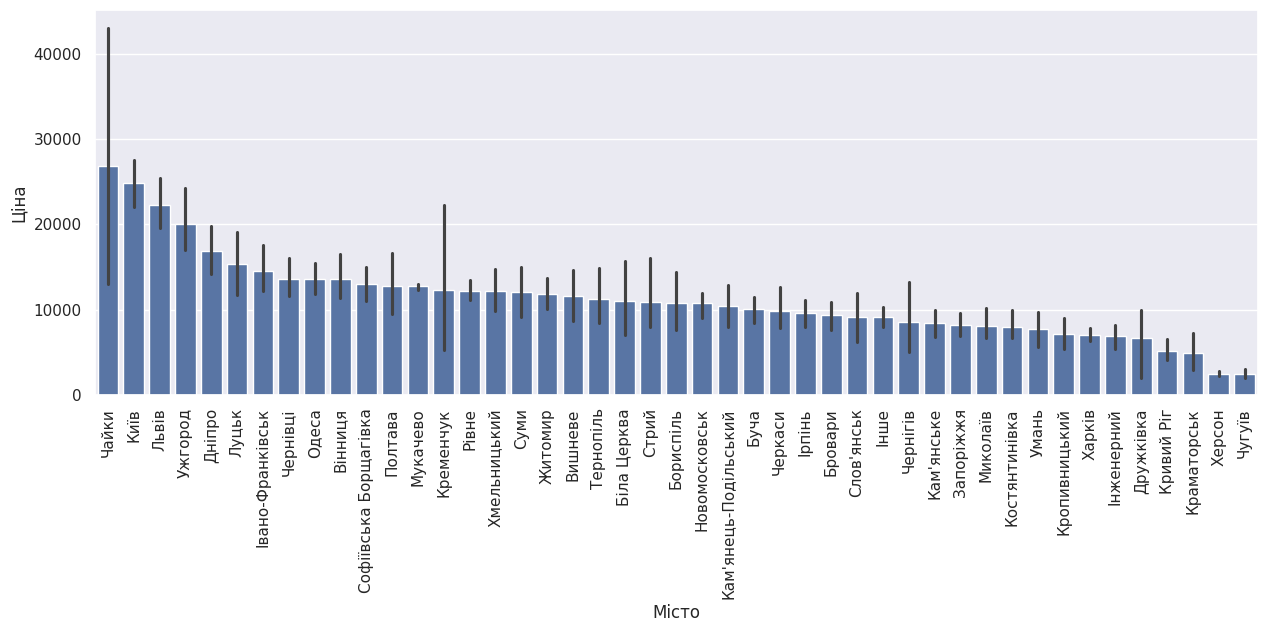

In [4920]:
grouped = df.groupby(['Місто'])['Ціна'].aggregate('mean').reset_index().sort_values('Ціна', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x='Місто', y='Ціна', data=df, order=grouped['Місто'])
plt.xticks(rotation=90)
plt.show()

# Define function for ANOVA test

In [4921]:
def anova_test(df, column):
    original_column = column
    if ' ' in column:
        column = column.replace(" ", "_")
        df.rename(columns={original_column: column}, inplace=True)   
        
    model = ols('Ціна ~ C('+column+')', data=df).fit()        
    anova_table = sm.stats.anova_lm(model, typ=2)

    if column != original_column:        
        df.rename(columns={column: original_column}, inplace=True)
        
    return anova_table

# ANOVA test for city column

In [4922]:
anova_test(df, 'Місто')

,sum_sq,df,F,PR(>F)
C(Місто),4.561265e+10,44.0,8.417861,1.294604e-44
Residual,1.366954e+11,1110.0,NaN,NaN


# Fill null values in district column with 'unknown' value and also replace rarely seen values with 'unknown'

In [4923]:
df[['Місто', 'Район']].isnull().sum()

Місто      0
Район    376
dtype: int64

In [4924]:
df['Район'] = df['Район'].fillna('Невідомо')

In [4925]:
disctrict_value_counts = df['Район'].value_counts()

In [4926]:
disctrict_value_counts_less_than_6 = disctrict_value_counts[disctrict_value_counts < 6]
df['Район'] = df['Район'].apply(lambda x: 'Невідомо' if x in disctrict_value_counts_less_than_6 else x)
df['Район'].value_counts()

Район
Невідомо                       442
Приморський (Одеса)             98
Шевченківський  (Харків)        38
Центральний (Дніпро)            31
Київський (Одеса)               31
Київський (Харків)              30
Печерський (Київ)               27
Хаджибейський (Одеса)           24
Дарницький (Київ)               23
Соборний (Дніпро)               22
Голосіївський (Київ)            22
Дніпровський (Київ)             21
Шевченківський (Львів)          21
Солом'янський (Київ)            20
Шевченківський (Київ)           20
Галицький (Львів)               19
Франківський (Львів)            17
Святошинський (Київ)            17
Салтівський (Харків)            16
Центральний (Миколаїв)          16
Вознесенівський (Запоріжжя)     15
Слобідський (Харків)            15
Немишлянський (Харків)          14
Пересипський (Одеса)            13
Шевченківський (Дніпро)         11
Холодногірський (Харків)        11
Подільський (Київ)              11
Сихівський (Львів)              11
Личаківський (

# Check average rent prices by district

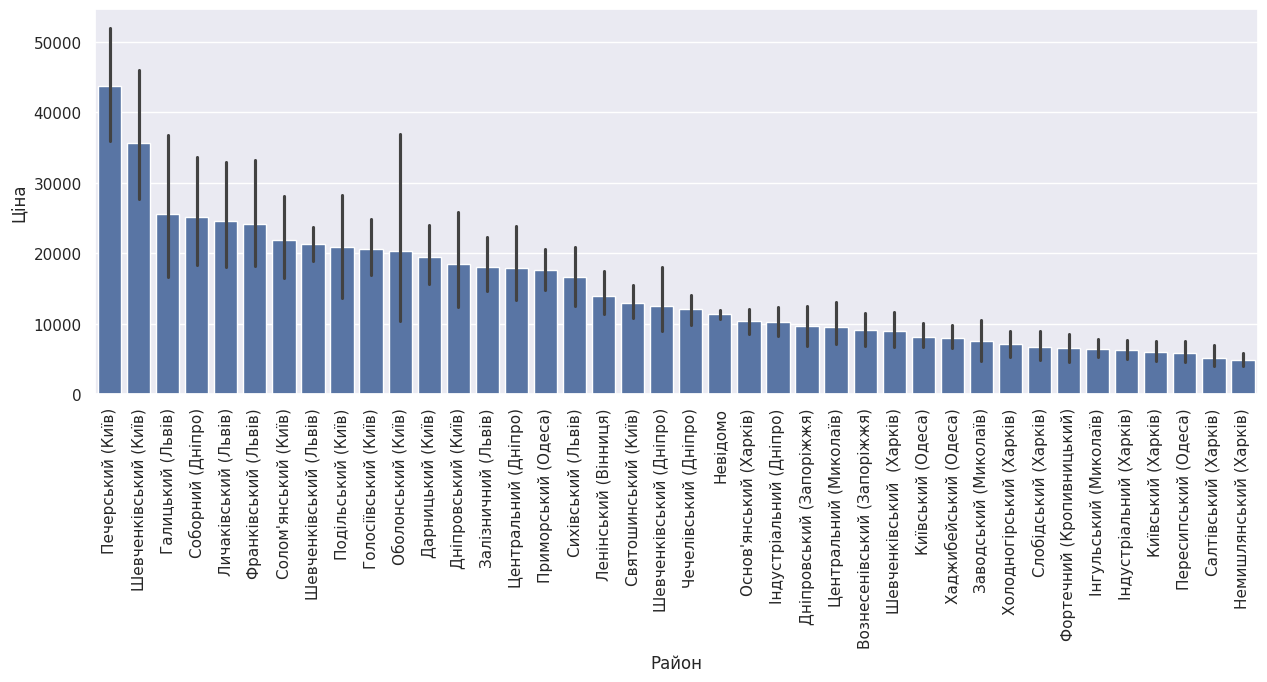

In [4927]:
grouped = df.groupby(['Район'])['Ціна'].aggregate('mean').reset_index().sort_values('Ціна', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x='Район', y='Ціна', data=df, order=grouped['Район'])
plt.xticks(rotation=90)
plt.show()

# ANOVA test for district column

In [4928]:
anova_test(df, 'Район')

,sum_sq,df,F,PR(>F)
C(Район),6.431825e+10,39.0,15.58476,6.486716e-80
Residual,1.179898e+11,1115.0,NaN,NaN


# Remove original City/District column

In [4929]:
df.drop("Локація (Місто, Район)", axis=1, inplace=True)

# Convert 'floor' and 'floors number' columns to integer

In [4930]:
df['Поверх'] = df['Поверх'].astype('int32')
df['Поверховість'] = df['Поверховість'].astype('int32')

# Check distribution for 'floor' column

<Axes: xlabel='Поверх', ylabel='Count'>

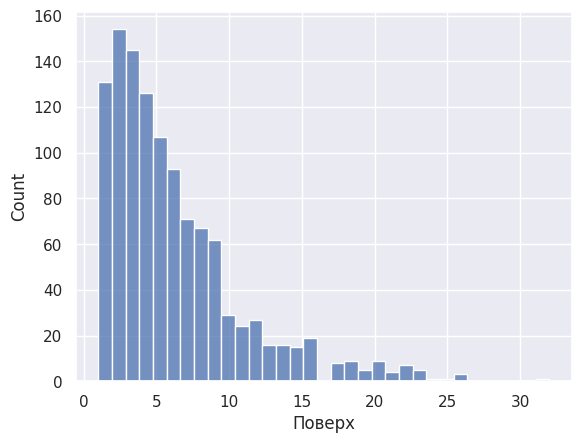

In [4931]:
sns.histplot(df['Поверх'])

# Check dependence 'price' from 'floor'

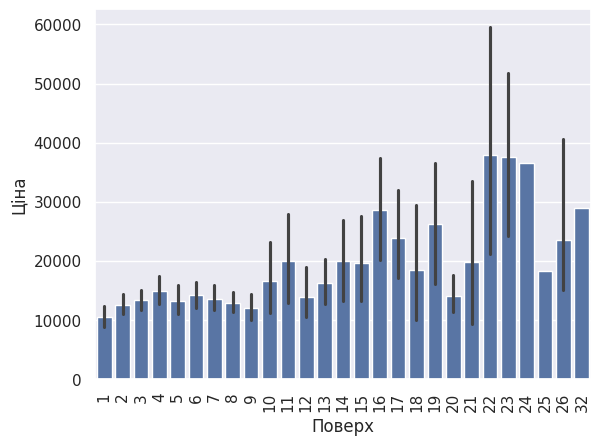

In [4932]:
sns.barplot(x=df['Поверх'], y=df['Ціна'])
plt.xticks(rotation=90)
plt.show()

# ANOVA test for floor column

In [4933]:
anova_test(df, 'Поверх')

,sum_sq,df,F,PR(>F)
C(Поверх),1.832830e+10,26.0,4.849173,3.624216e-14
Residual,1.639797e+11,1128.0,NaN,NaN


# Check distribution for 'floors number' column

<Axes: xlabel='Поверховість', ylabel='Count'>

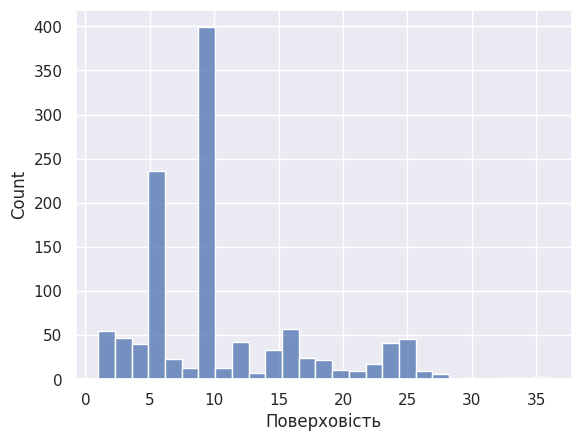

In [4934]:
sns.histplot(df['Поверховість'])

# Check dependence 'price' from 'floors number'

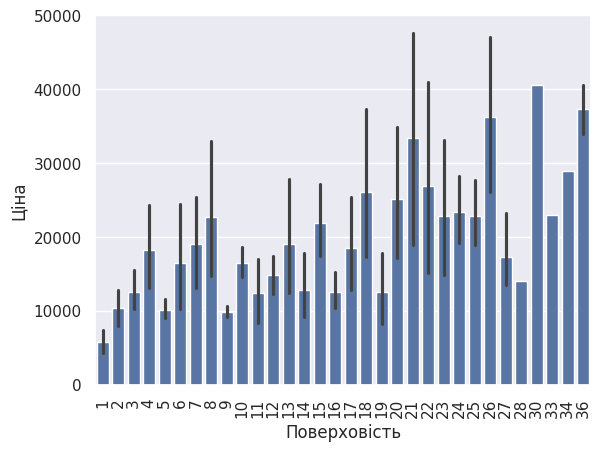

In [4935]:
sns.barplot(x=df['Поверховість'], y=df['Ціна'])
plt.xticks(rotation=90)
plt.show()

# ANOVA test for floors number column

In [4936]:
anova_test(df, 'Поверховість')

,sum_sq,df,F,PR(>F)
C(Поверховість),3.745188e+10,31.0,9.366012,2.688155e-38
Residual,1.448562e+11,1123.0,NaN,NaN


# Remove units and convert to float 'Total area' and 'Kitchen area' columns

In [4937]:
df['Загальна площа'].str.contains(' м²').sum()

1155

In [4938]:
df['Загальна площа'] = df['Загальна площа'].str.replace(' м²', '')
df['Загальна площа'] = df['Загальна площа'].astype('float32')

In [4939]:
df['Загальна площа'].describe()

count    1155.000000
mean       54.582329
std        26.575806
min        12.000000
25%        38.700001
50%        49.000000
75%        65.000000
max       248.000000
Name: Загальна площа, dtype: float64

# Check distribution for 'Total area' column

<Axes: xlabel='Загальна площа', ylabel='Density'>

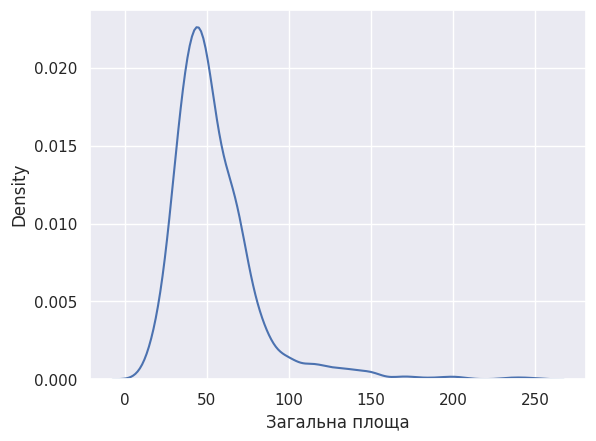

In [4940]:
sns.kdeplot(df['Загальна площа'])

# Check dependence 'price' from 'Total area'

<Axes: xlabel='Загальна площа', ylabel='Ціна'>

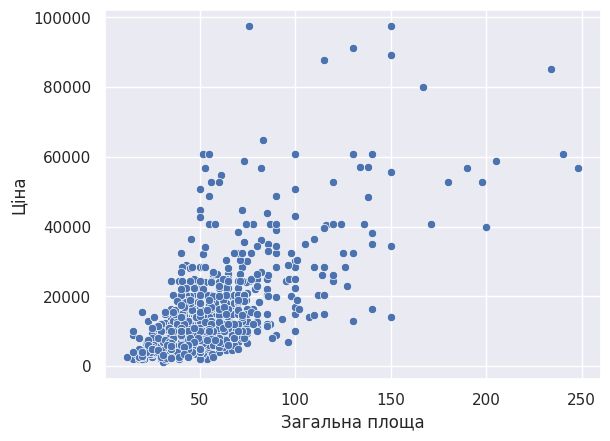

In [4941]:
sns.scatterplot(x=df['Загальна площа'], y=df['Ціна'])

In [4942]:
df['Площа кухні'].str.contains(' м²').sum()

1155

In [4943]:
df['Площа кухні'] = df['Площа кухні'].str.replace(' м²', '')
df['Площа кухні'] = df['Площа кухні'].astype('float32')

In [4944]:
df['Площа кухні'].describe()

count    1155.000000
mean       11.967585
std         6.768312
min         1.000000
25%         7.000000
50%        10.000000
75%        15.000000
max        60.000000
Name: Площа кухні, dtype: float64

# Check distribution for 'Kitchen area' column

<Axes: xlabel='Площа кухні', ylabel='Density'>

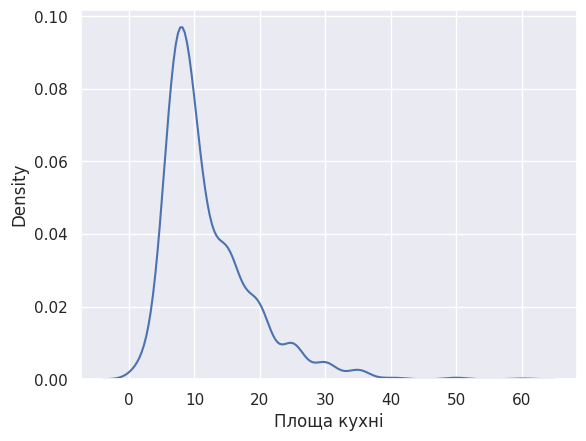

In [4945]:
sns.kdeplot(df['Площа кухні'])

# Check dependence 'price' from 'Kitchen area'

<Axes: xlabel='Площа кухні', ylabel='Ціна'>

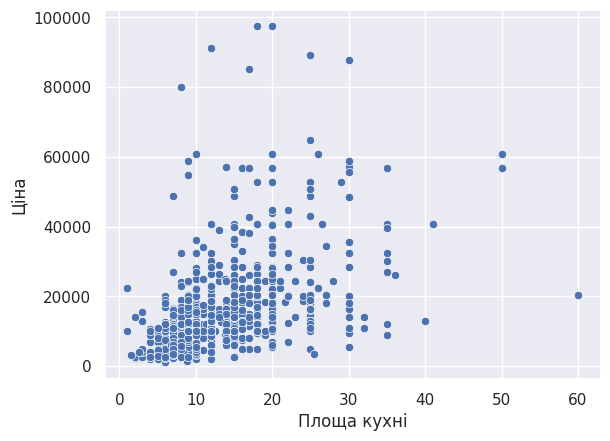

In [4946]:
sns.scatterplot(x=df['Площа кухні'], y=df['Ціна'])

# 'Number of rooms' column seems fine, no changes required

In [4947]:
df['Кількість кімнат'].value_counts()

Кількість кімнат
1 кімната    513
2 кімнати    431
3 кімнати    179
4 кімнати     23
5+ кімнат      9
Name: count, dtype: int64

# Check distribution for 'Number of rooms' column

<Axes: xlabel='Кількість кімнат', ylabel='Count'>

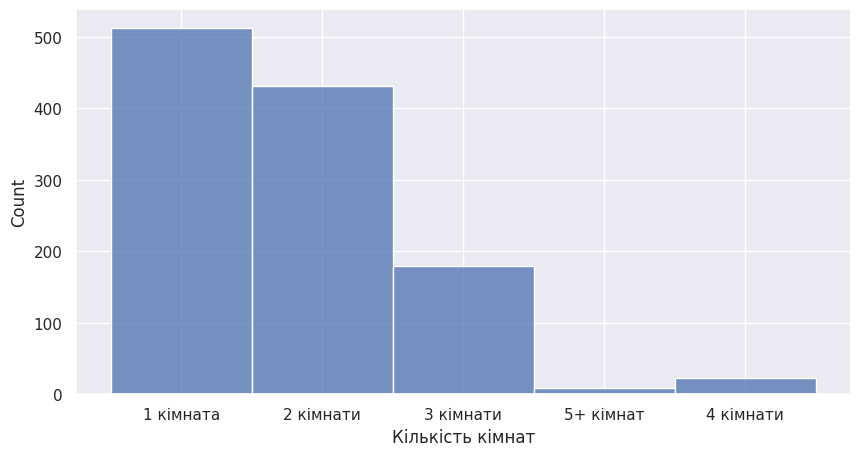

In [4948]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Кількість кімнат'])

# Check dependence 'price' from 'Number of rooms'

<Axes: xlabel='Кількість кімнат', ylabel='Ціна'>

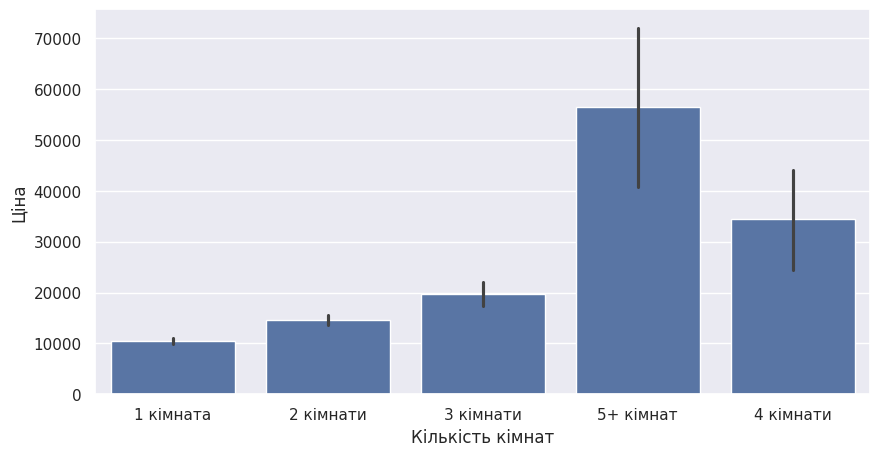

In [4949]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Кількість кімнат'], y=df['Ціна'])

# ANOVA test for Number of rooms column

In [4950]:
anova_test(df, 'Кількість кімнат')

,sum_sq,df,F,PR(>F)
C(Кількість_кімнат),3.783261e+10,4.0,75.285292,9.966774e-57
Residual,1.444754e+11,1150.0,NaN,NaN


In [4951]:
df.head()

,Ціна,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Домашні улюбленці,Автономність при блекауті,Місто,Район
0,10000.0,2,3,28.0,15.0,1 кімната,З меблями,Житловий стан,"Так, котик 😸, Так, маленький песик(до 10 кг) 🐕","Працює інтернет, Працює водопопостачання, Прац...",Дніпро,Центральний (Дніпро)
1,17000.0,16,20,52.0,12.0,1 кімната,З меблями,Євроремонт,Ні 🥺,NaN,Київ,Голосіївський (Київ)
2,15000.0,11,12,60.0,15.0,2 кімнати,З меблями,Євроремонт,Ні 🥺,NaN,Запоріжжя,Вознесенівський (Запоріжжя)
3,7000.0,3,5,47.5,5.0,2 кімнати,З меблями,NaN,"Так, великий песик 🐶, Так, котик 😸",NaN,Харків,Київський (Харків)
4,7500.0,3,5,37.0,7.0,1 кімната,З меблями,NaN,NaN,"Працює опалення, Працює водопопостачання",Рівне,Невідомо


# Check 'Furniture' column and fill null values with 'unknown' value 

In [4952]:
df['Меблювання'].value_counts()

Меблювання
З меблями     968
Без меблів     10
Name: count, dtype: int64

In [4953]:
df['Меблювання'].isnull().sum()

177

In [4954]:
df['Меблювання'] = df['Меблювання'].fillna('Не вказано')

# Check distribution for 'Furniture' column

<Axes: xlabel='Меблювання', ylabel='Count'>

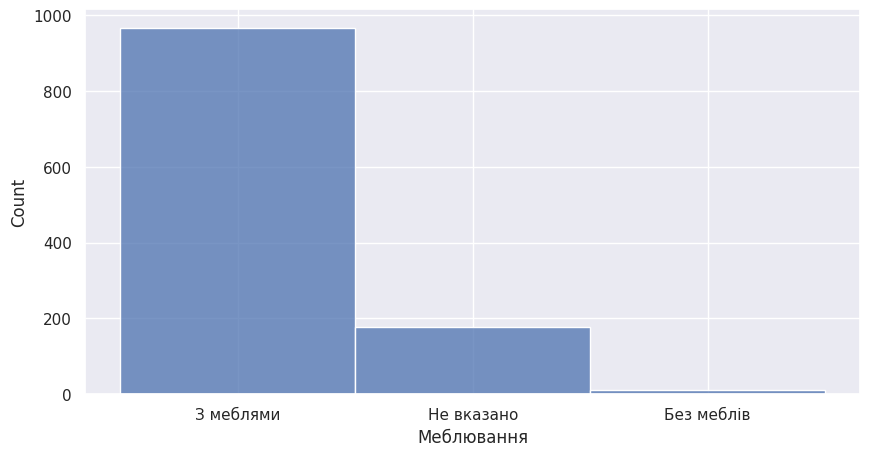

In [4955]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Меблювання'])

# Check dependence 'price' from 'Furniture'

<Axes: xlabel='Меблювання', ylabel='Ціна'>

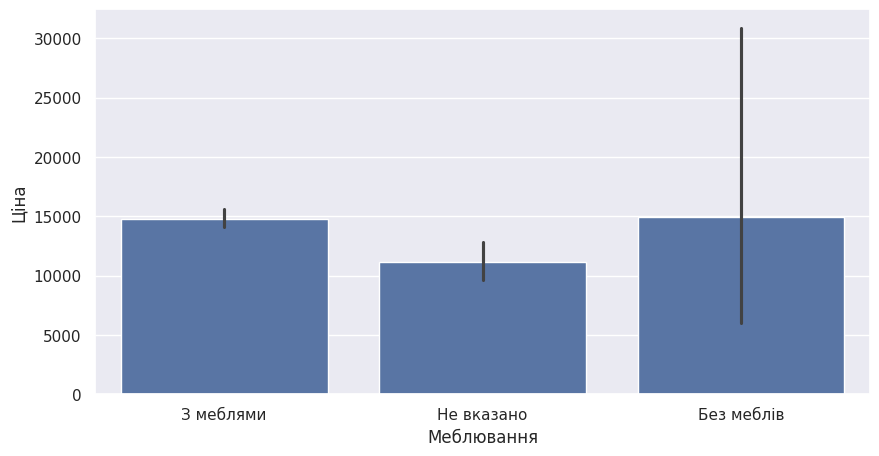

In [4956]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Меблювання'], y=df['Ціна'])

In [4957]:
df = df[df['Меблювання'] != 'Без меблів']

# ANOVA test for furniture column

In [4958]:
anova_test(df, 'Меблювання')

,sum_sq,df,F,PR(>F)
C(Меблювання),1.992024e+09,1.0,12.976841,0.000329
Residual,1.754575e+11,1143.0,NaN,NaN


In [4959]:
#df.drop(columns=['Меблювання'], inplace=True)

# Check 'Repair' column, fill null values with 'unknown'

In [4960]:
df['Ремонт'].value_counts()

Ремонт
Євроремонт            411
Авторський проект     181
Косметичний ремонт    160
Житловий стан         123
Name: count, dtype: int64

In [4961]:
df['Ремонт'].isnull().sum()

270

In [4962]:
df['Ремонт'] = df['Ремонт'].fillna('Не вказано')

# Check distribution for 'Repair' column

<Axes: xlabel='Ремонт', ylabel='Count'>

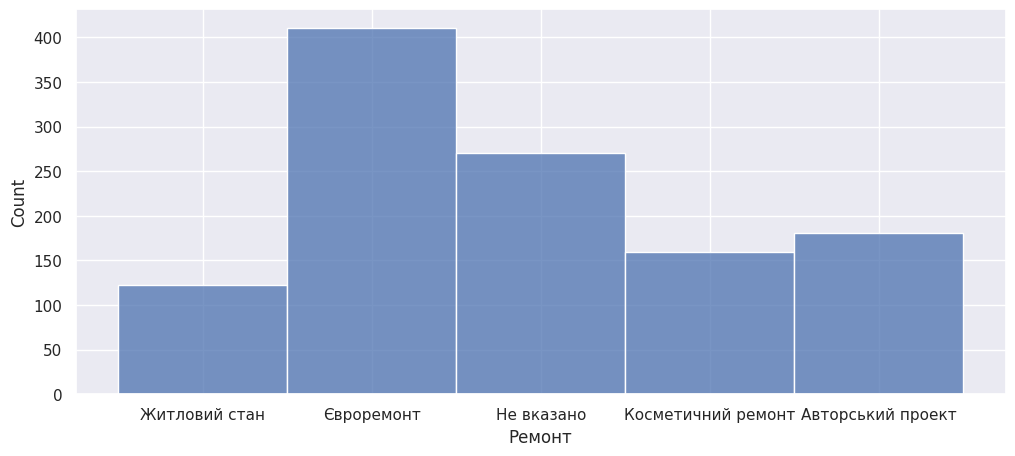

In [4963]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Ремонт'])

# Check dependence 'price' from 'Repair'

<Axes: xlabel='Ремонт', ylabel='Ціна'>

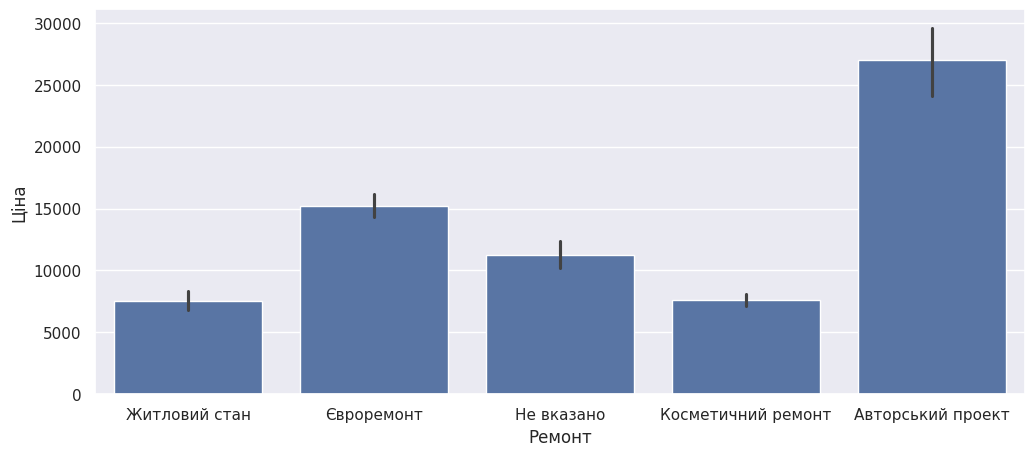

In [4964]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Ремонт'], y=df['Ціна'])

# ANOVA test for Repair column

In [4965]:
anova_test(df, 'Ремонт')

,sum_sq,df,F,PR(>F)
C(Ремонт),4.463912e+10,4.0,95.791826,2.686348e-70
Residual,1.328104e+11,1140.0,NaN,NaN


# Convert 'Pets' column to binary format

In [4966]:
df['Домашні улюбленці'].value_counts()

Домашні улюбленці
Ні 🥺                                                                                                                           342
Так, маленький песик(до 10 кг) 🐕                                                                                                24
Так, маленький песик(до 10 кг) 🐕, Так, котик 😸                                                                                  24
Так, котик 😸                                                                                                                    23
Так, котик 😸, Так, маленький песик(до 10 кг) 🐕                                                                                  22
Так, котик 😸, Так, маленький песик(до 10 кг) 🐕, Так, інша тваринка 🦕                                                             7
Так, інша тваринка 🦕                                                                                                             6
Так, котик 😸, Так, маленький песик(до 10 кг) 🐕, Так, середній пес

In [4967]:
df['Домашні улюбленці'].isnull().sum()

620

In [4968]:
df['Домашні улюбленці'] = df['Домашні улюбленці'].fillna('').apply(lambda x: 1 if 'Так' in x else 0)
df['Домашні улюбленці'] = df['Домашні улюбленці'].astype('int32')

# Check distribution for 'Pets' column

<Axes: xlabel='Домашні улюбленці'>

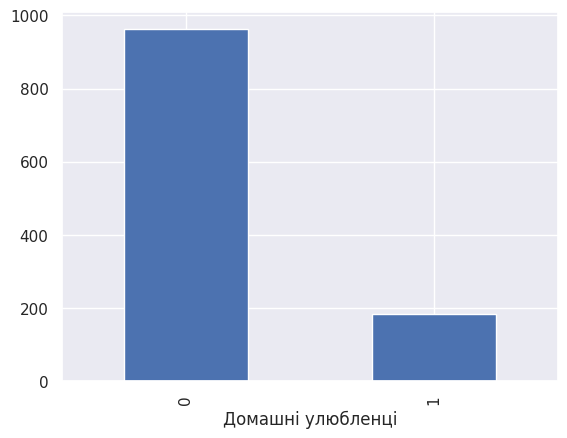

In [4969]:
df['Домашні улюбленці'].value_counts().plot(kind='bar')

# Check dependence 'price' from 'Pets'

<Axes: xlabel='Домашні улюбленці', ylabel='Ціна'>

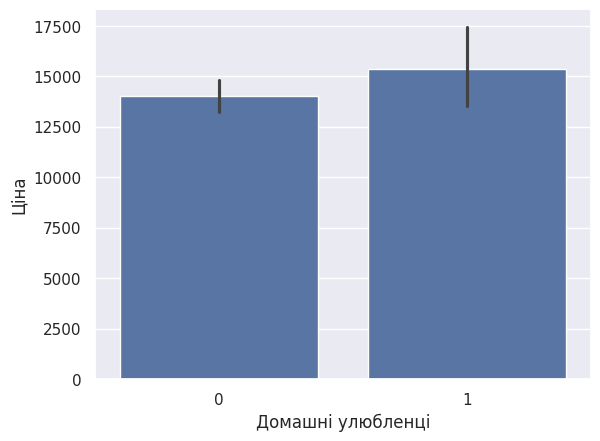

In [4970]:
sns.barplot(x=df['Домашні улюбленці'], y=df['Ціна'])

# ANOVA test for Pets column (result saying that there is no significant difference between groups)

In [4971]:
anova_test(df, 'Домашні улюбленці')

,sum_sq,df,F,PR(>F)
C(Домашні_улюбленці),2.739669e+08,1.0,1.767423,0.183967
Residual,1.771755e+11,1143.0,NaN,NaN


# Select unique utilities, create binary columns for each and remove original column

In [4972]:
df['Автономність при блекауті'].value_counts()

Автономність при блекауті
Працює інтернет                                                                                         23
Працює ліфт                                                                                             18
Працює інтернет, Працює ліфт, Працює водопопостачання, Працює опалення                                  18
Працює інтернет, Працює водопопостачання, Працює опалення                                               16
Працює водопопостачання, Працює опалення                                                                16
                                                                                                        ..
Працює ліфт, Працює опалення                                                                             1
Працює ліфт, Працює опалення, Працює інтернет                                                            1
Працює ліфт, Працює інтернет, Працює водопопостачання, Працює опалення                                   1
Підключене 

In [4973]:
df['Автономність при блекауті'].isnull().sum()

869

In [4974]:
unique_utilities = set()
for value in df['Автономність при блекауті'].unique():
    if type(value) == str:
        unique_utilities.update(value.split(', '))
for utility in unique_utilities:
    df[utility] = df['Автономність при блекауті'].apply(lambda x: 1 if (type(x) == str) and (utility in x) else 0)
df.head()

,Ціна,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Домашні улюбленці,Автономність при блекауті,Місто,Район,Працює інтернет,Працює водопопостачання,Підключене резервне живлення,Працює ліфт,Працює опалення
0,10000.0,2,3,28.0,15.0,1 кімната,З меблями,Житловий стан,1,"Працює інтернет, Працює водопопостачання, Прац...",Дніпро,Центральний (Дніпро),1,1,0,0,1
1,17000.0,16,20,52.0,12.0,1 кімната,З меблями,Євроремонт,0,NaN,Київ,Голосіївський (Київ),0,0,0,0,0
2,15000.0,11,12,60.0,15.0,2 кімнати,З меблями,Євроремонт,0,NaN,Запоріжжя,Вознесенівський (Запоріжжя),0,0,0,0,0
3,7000.0,3,5,47.5,5.0,2 кімнати,З меблями,Не вказано,1,NaN,Харків,Київський (Харків),0,0,0,0,0
4,7500.0,3,5,37.0,7.0,1 кімната,З меблями,Не вказано,0,"Працює опалення, Працює водопопостачання",Рівне,Невідомо,0,1,0,0,1


In [4975]:
df.drop(columns=['Автономність при блекауті'], inplace=True)
df.head()

,Ціна,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Домашні улюбленці,Місто,Район,Працює інтернет,Працює водопопостачання,Підключене резервне живлення,Працює ліфт,Працює опалення
0,10000.0,2,3,28.0,15.0,1 кімната,З меблями,Житловий стан,1,Дніпро,Центральний (Дніпро),1,1,0,0,1
1,17000.0,16,20,52.0,12.0,1 кімната,З меблями,Євроремонт,0,Київ,Голосіївський (Київ),0,0,0,0,0
2,15000.0,11,12,60.0,15.0,2 кімнати,З меблями,Євроремонт,0,Запоріжжя,Вознесенівський (Запоріжжя),0,0,0,0,0
3,7000.0,3,5,47.5,5.0,2 кімнати,З меблями,Не вказано,1,Харків,Київський (Харків),0,0,0,0,0
4,7500.0,3,5,37.0,7.0,1 кімната,З меблями,Не вказано,0,Рівне,Невідомо,0,1,0,0,1


# Check distrbitions and influences on 'price' column from all utilities columns

<Axes: xlabel='Працює ліфт'>

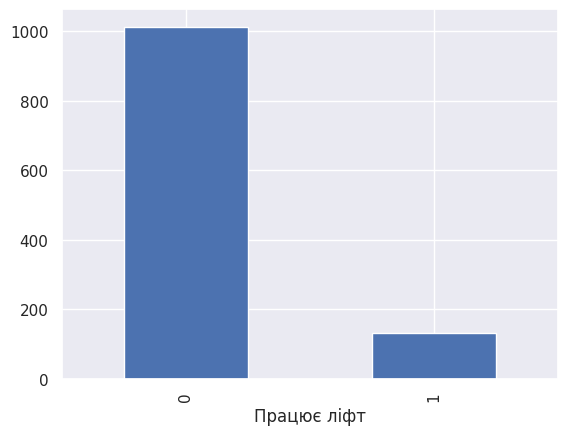

In [4976]:
df['Працює ліфт'].value_counts().plot(kind='bar')

<Axes: xlabel='Працює ліфт', ylabel='Ціна'>

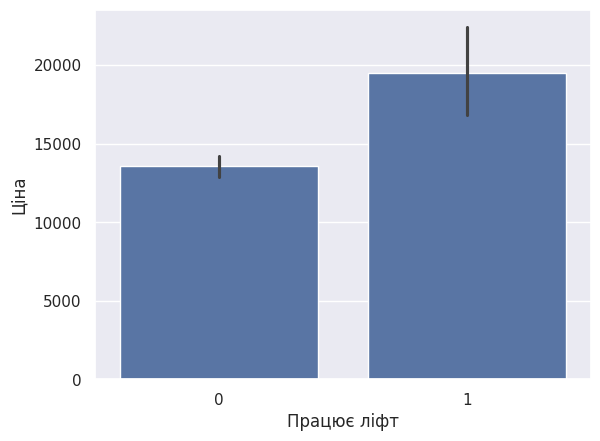

In [4977]:
sns.barplot(x=df['Працює ліфт'], y=df['Ціна'])

In [4978]:
anova_test(df, 'Працює ліфт')

,sum_sq,df,F,PR(>F)
C(Працює_ліфт),4.117531e+09,1.0,27.152162,2.229719e-07
Residual,1.733320e+11,1143.0,NaN,NaN


<Axes: xlabel='Працює водопопостачання'>

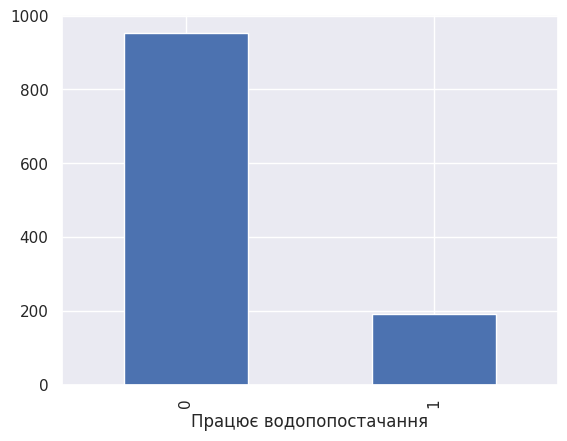

In [4979]:
df['Працює водопопостачання'].value_counts().plot(kind='bar')

<Axes: xlabel='Працює водопопостачання', ylabel='Ціна'>

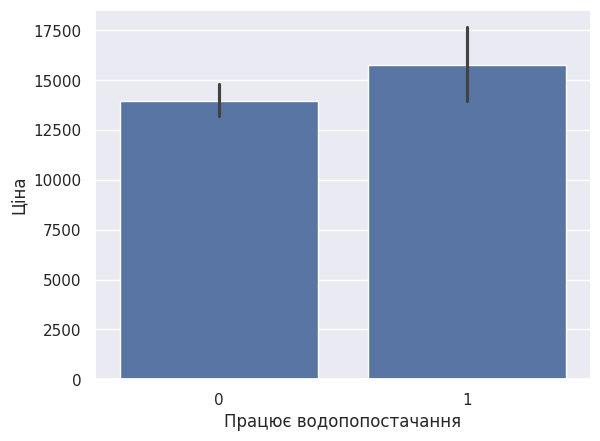

In [4980]:
sns.barplot(x=df['Працює водопопостачання'], y=df['Ціна'])

In [4981]:
anova_test(df, 'Працює водопопостачання')

,sum_sq,df,F,PR(>F)
C(Працює_водопопостачання),5.120579e+08,1.0,3.307848,0.069211
Residual,1.769374e+11,1143.0,NaN,NaN


<Axes: xlabel='Працює опалення'>

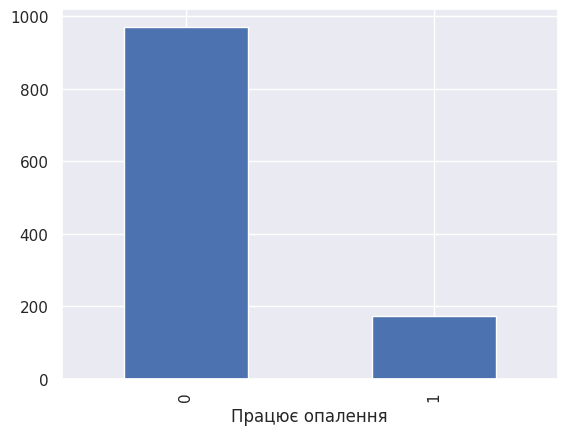

In [4982]:
df['Працює опалення'].value_counts().plot(kind='bar')

<Axes: xlabel='Працює опалення', ylabel='Ціна'>

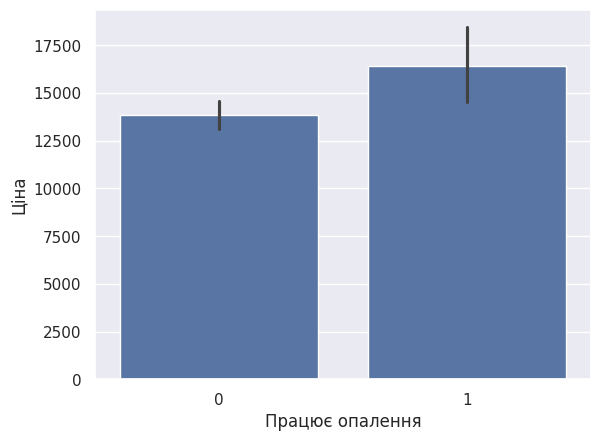

In [4983]:
sns.barplot(x=df['Працює опалення'], y=df['Ціна'])

In [4984]:
anova_test(df, 'Працює опалення')

,sum_sq,df,F,PR(>F)
C(Працює_опалення),9.615647e+08,1.0,6.227442,0.012719
Residual,1.764879e+11,1143.0,NaN,NaN


<Axes: xlabel='Підключене резервне живлення'>

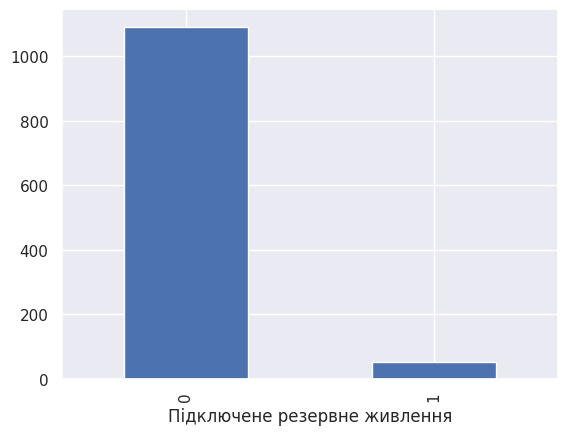

In [4985]:
df['Підключене резервне живлення'].value_counts().plot(kind='bar')

<Axes: xlabel='Підключене резервне живлення', ylabel='Ціна'>

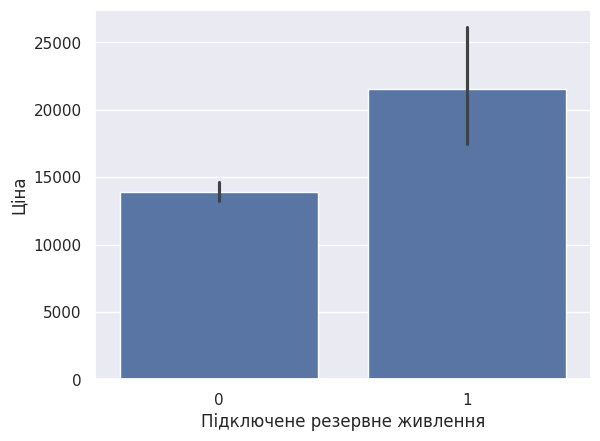

In [4986]:
sns.barplot(x=df['Підключене резервне живлення'], y=df['Ціна'])

In [4987]:
anova_test(df, 'Підключене резервне живлення')

,sum_sq,df,F,PR(>F)
C(Підключене_резервне_живлення),2.930325e+09,1.0,19.191936,0.000013
Residual,1.745192e+11,1143.0,NaN,NaN


<Axes: xlabel='Працює інтернет'>

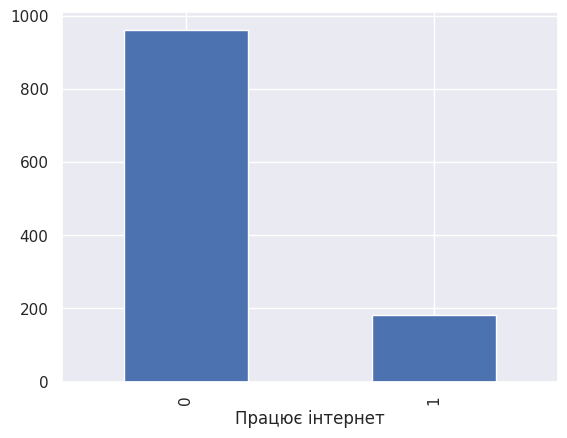

In [4988]:
df['Працює інтернет'].value_counts().plot(kind='bar')

<Axes: xlabel='Працює інтернет', ylabel='Ціна'>

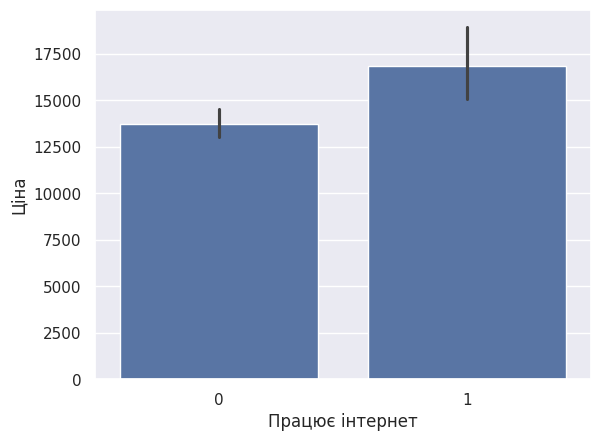

In [4989]:
sns.barplot(x=df['Працює інтернет'], y=df['Ціна'])

In [4990]:
anova_test(df, 'Працює інтернет')

,sum_sq,df,F,PR(>F)
C(Працює_інтернет),1.504103e+09,1.0,9.771155,0.001817
Residual,1.759454e+11,1143.0,NaN,NaN


# Check correlation for 'price' with all numerical features

In [4991]:
df.corr(numeric_only=True)['Ціна']

Ціна                            1.000000
Поверх                          0.254015
Поверховість                    0.338356
Загальна площа                  0.654487
Площа кухні                     0.555905
Домашні улюбленці               0.039293
Працює інтернет                 0.092066
Працює водопопостачання         0.053718
Підключене резервне живлення    0.128505
Працює ліфт                     0.152328
Працює опалення                 0.073613
Name: Ціна, dtype: float64

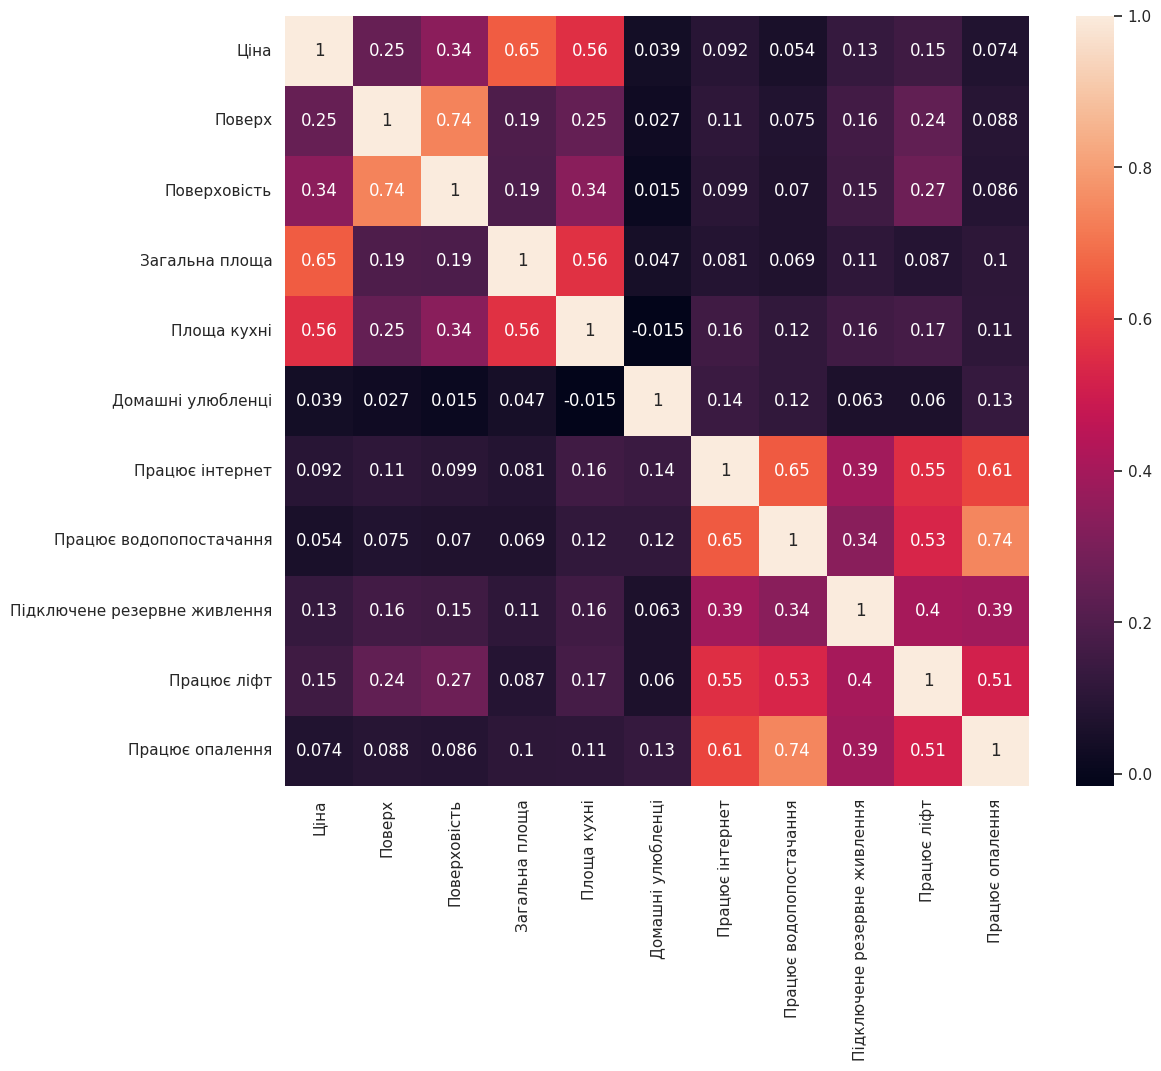

In [4992]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# Remove columns with weak correlation with 'price'

In [4993]:
df.drop('Домашні улюбленці', axis=1, inplace=True)
df.drop(columns=['Працює інтернет', 'Працює опалення', 'Працює водопопостачання'], inplace=True)

# Take another look at the relationships between numerical columns from dataset

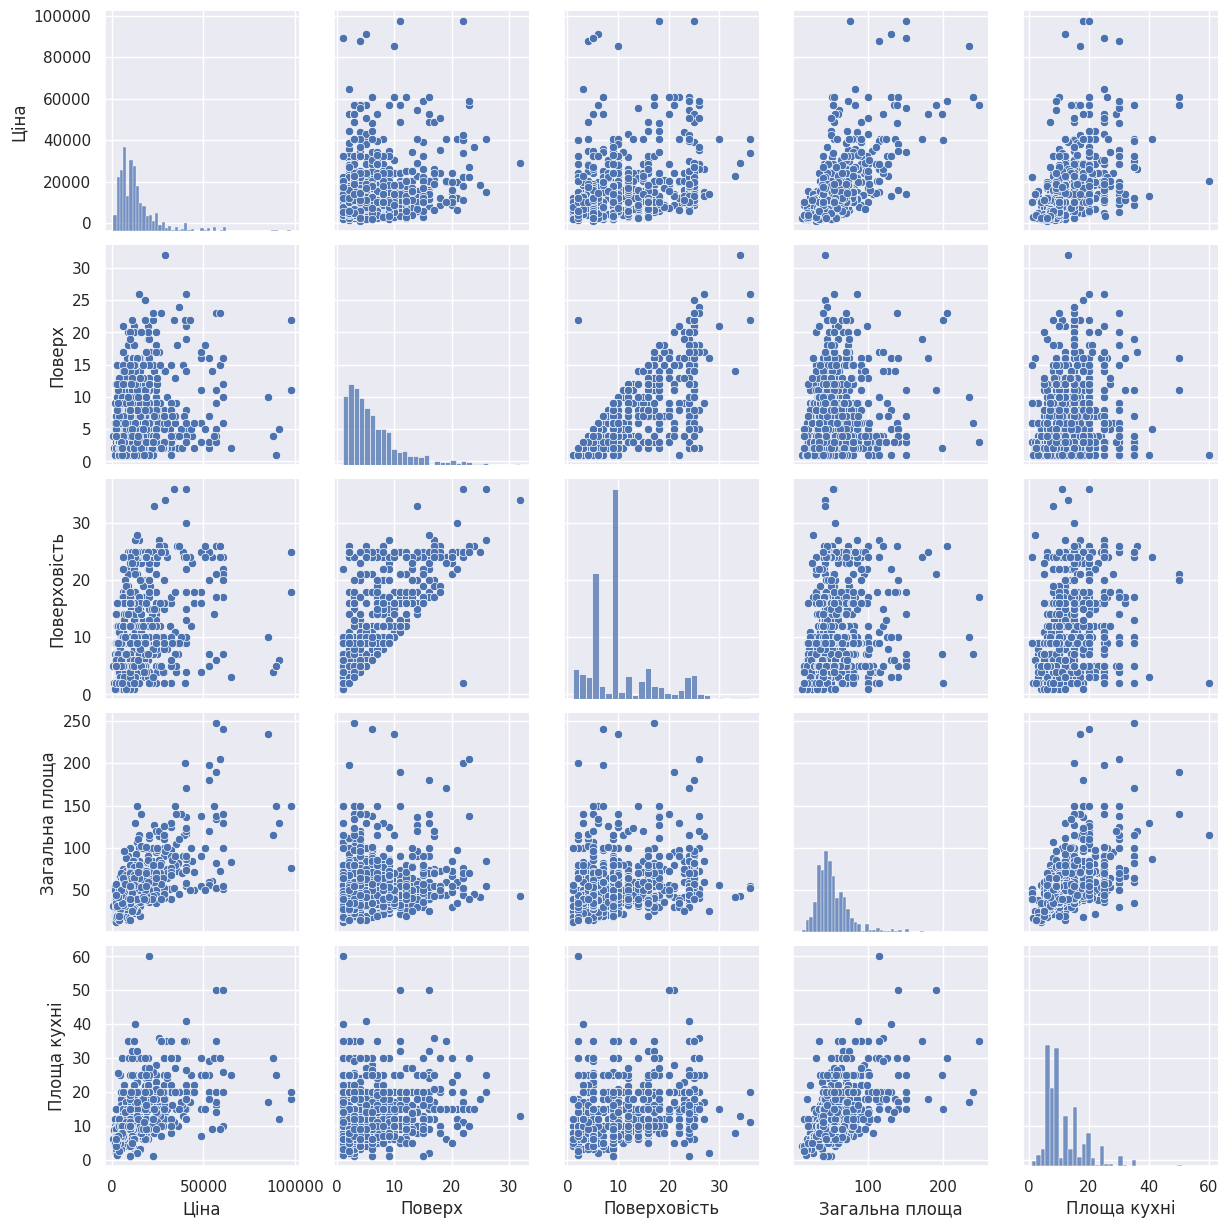

In [4994]:
sns.set()
cols = ['Ціна', 'Поверх', 'Поверховість', 'Загальна площа', 'Площа кухні']
sns.pairplot(df[cols], height=2.5)
plt.show()

# From graph above i am notice that there is data point where 'floor' > than 'floor numbers' which make no sense. I think its fine to fix this data point by hands 

In [4995]:
df[df['Поверх'] > df['Поверховість']].head()

,Ціна,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Місто,Район,Підключене резервне живлення,Працює ліфт
172,40000.0,22,2,200.0,15.0,5+ кімнат,З меблями,Авторський проект,Київ,Дарницький (Київ),0,0


In [4996]:
df.at[172, 'Поверховість'] = df.at[172, 'Поверх']

In [4997]:
df.loc[172]

Ціна                                      40000.0
Поверх                                         22
Поверховість                                   22
Загальна площа                              200.0
Площа кухні                                  15.0
Кількість кімнат                        5+ кімнат
Меблювання                              З меблями
Ремонт                          Авторський проект
Місто                                        Київ
Район                           Дарницький (Київ)
Підключене резервне живлення                    0
Працює ліфт                                     0
Name: 172, dtype: object

# Check for duplicates once more after all data changes

In [4998]:
df.duplicated().sum()

99

In [4999]:
df.drop_duplicates(inplace=True)
df.shape

(1046, 12)

# Apply log transformation for 'price' to get more 'normal' distribution

/tmp/ipykernel_36753/410710953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ціна'], fit=norm);


((array([-3.21053308, -2.9463104 , -2.79892693, ...,  2.79892693,
          2.9463104 ,  3.21053308]),
  array([ 1000.,  1500.,  1999., ..., 91302., 97389., 97389.], dtype=float32)),
 (10664.417260179785, 14323.442382812502, 0.8495671562294415))

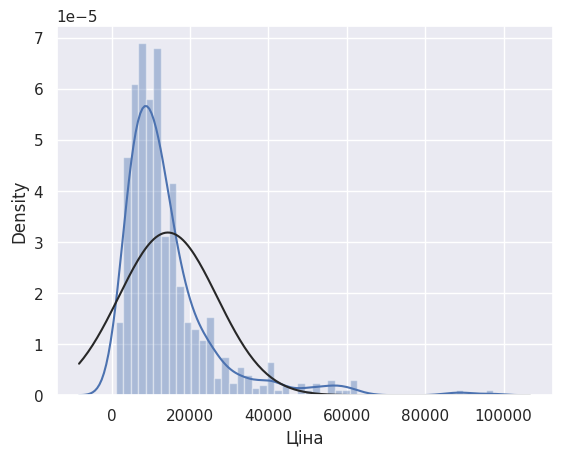

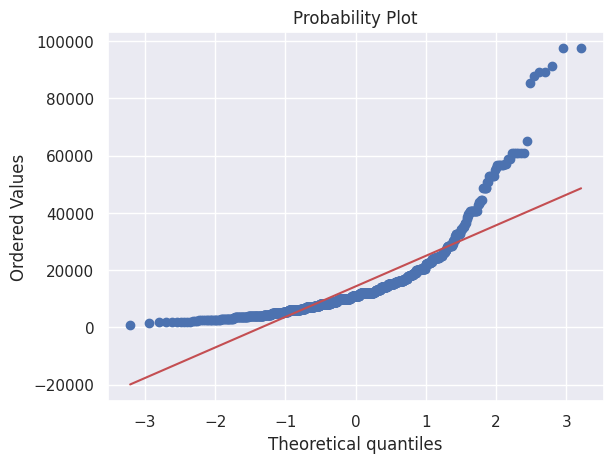

In [5000]:
sns.distplot(df['Ціна'], fit=norm);
fig = plt.figure()
stats.probplot(df['Ціна'], plot=plt)

In [5001]:
df_clean = df.copy()
df['Ціна'] = np.log(df['Ціна'])
df.head()

,Ціна,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Місто,Район,Підключене резервне живлення,Працює ліфт
0,9.210340,2,3,28.0,15.0,1 кімната,З меблями,Житловий стан,Дніпро,Центральний (Дніпро),0,0
1,9.740969,16,20,52.0,12.0,1 кімната,З меблями,Євроремонт,Київ,Голосіївський (Київ),0,0
2,9.615806,11,12,60.0,15.0,2 кімнати,З меблями,Євроремонт,Запоріжжя,Вознесенівський (Запоріжжя),0,0
3,8.853665,3,5,47.5,5.0,2 кімнати,З меблями,Не вказано,Харків,Київський (Харків),0,0
4,8.922658,3,5,37.0,7.0,1 кімната,З меблями,Не вказано,Рівне,Невідомо,0,0


/tmp/ipykernel_36753/1449441132.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ціна'], fit=norm);


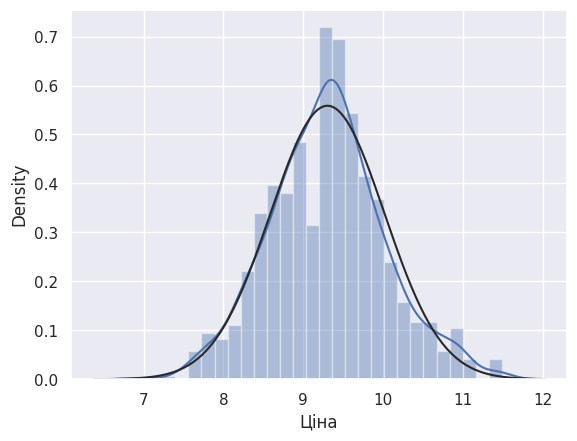

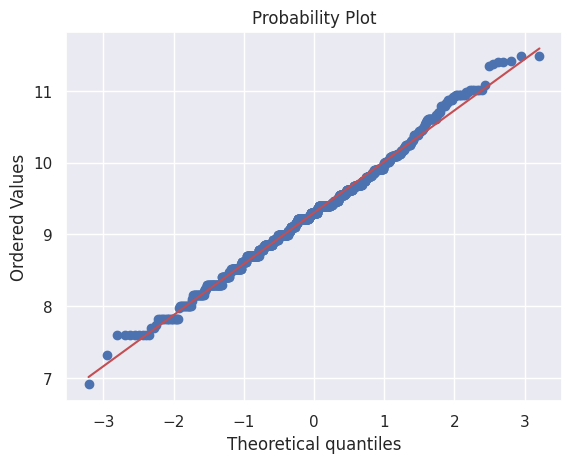

In [5002]:
sns.distplot(df['Ціна'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Ціна'], plot=plt)

# Create train, test data

In [5003]:
X = df.drop('Ціна', axis=1)
y = df['Ціна']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.15)

# Create some helpful functions and data for testing

In [5004]:
data = [{
    'Поверх': 14, 'Поверховість': 16, 'Загальна площа': 38.0, 'Площа кухні': 10.0, 'Кількість кімнат': '1 кімната', 'Меблювання': 'З меблями',
    'Ремонт': 'Косметичний ремонт', 'Місто': 'Одеса', 'Район': 'Київський (Одеса)', 'Підключене резервне живлення': 0, 'Працює ліфт': 0
},
{
    'Поверх': 20, 'Поверховість': 25, 'Загальна площа': 48.0, 'Площа кухні': 20.0, 'Кількість кімнат': '2 кімнати', 'Меблювання': 'З меблями',
    'Ремонт': 'Євроремонт', 'Місто': 'Одеса', 'Район': 'Приморський (Одеса)', 'Підключене резервне живлення': 1, 'Працює ліфт': 0
},
{
    'Поверх': 2, 'Поверховість': 5, 'Загальна площа': 20.0, 'Площа кухні': 7.0, 'Кількість кімнат': '1 кімната', 'Меблювання': 'З меблями',
    'Ремонт': 'Косметичний ремонт', 'Місто': 'Запоріжжя', 'Район': 'Невідомо', 'Підключене резервне живлення': 0, 'Працює ліфт': 0
},
{
    'Поверх': 30, 'Поверховість': 30, 'Загальна площа': 250.0, 'Площа кухні': 25.0, 'Кількість кімнат': '5+ кімнат', 'Меблювання': 'З меблями',
    'Ремонт': 'Авторський проект', 'Місто': 'Київ', 'Район': 'Печерський (Київ)', 'Підключене резервне живлення': 1, 'Працює ліфт': 1
},
{
    'Поверх': 8, 'Поверховість': 9, 'Загальна площа': 38.0, 'Площа кухні': 10.0, 'Кількість кімнат': '1 кімната', 'Меблювання': 'З меблями',
    'Ремонт': 'Євроремонт', 'Місто': 'Львів', 'Район': 'Сихівський (Львів)', 'Підключене резервне живлення': 0, 'Працює ліфт': 0
},
{
    'Поверх': 2, 'Поверховість': 5, 'Загальна площа': 41.0, 'Площа кухні': 20.0, 'Кількість кімнат': '1 кімната', 'Меблювання': 'З меблями',
    'Ремонт': 'Авторський проект', 'Місто': 'Одеса', 'Район': 'Київський (Одеса)', 'Підключене резервне живлення': 0, 'Працює ліфт': 0
},
{
    'Поверх': 1, 'Поверховість': 9, 'Загальна площа': 46.0, 'Площа кухні': 9.0, 'Кількість кімнат': '2 кімнати', 'Меблювання': 'З меблями',
    'Ремонт': 'Житловий стан', 'Місто': 'Миколаїв', 'Район': 'Інгульський (Миколаїв)', 'Підключене резервне живлення': 0, 'Працює ліфт': 0
}]
manual_test_df = pd.DataFrame(data, index=[1,2,3,4,5,6,7])
manual_test_df.head(10)

,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Місто,Район,Підключене резервне живлення,Працює ліфт
1,14,16,38.0,10.0,1 кімната,З меблями,Косметичний ремонт,Одеса,Київський (Одеса),0,0
2,20,25,48.0,20.0,2 кімнати,З меблями,Євроремонт,Одеса,Приморський (Одеса),1,0
3,2,5,20.0,7.0,1 кімната,З меблями,Косметичний ремонт,Запоріжжя,Невідомо,0,0
4,30,30,250.0,25.0,5+ кімнат,З меблями,Авторський проект,Київ,Печерський (Київ),1,1
5,8,9,38.0,10.0,1 кімната,З меблями,Євроремонт,Львів,Сихівський (Львів),0,0
6,2,5,41.0,20.0,1 кімната,З меблями,Авторський проект,Одеса,Київський (Одеса),0,0
7,1,9,46.0,9.0,2 кімнати,З меблями,Житловий стан,Миколаїв,Інгульський (Миколаїв),0,0


In [5005]:
def run_manual_test(pipes_dict, manual_test_df):
    manual_test_df_copy = manual_test_df.copy()
    for name, pipe in pipes_dict.items():
        if name in ['linear', 'Voting', 'Stacking']:
            manual_test_df_copy['pred_price_' + name.title()] = np.exp(pipe.predict(manual_test_df_copy))
        else:
            manual_test_df_copy['pred_price_' + name.title()] = np.exp(pipe.best_estimator_.predict(manual_test_df_copy))
    return manual_test_df_copy.head(10)

In [5006]:
def print_x_test_with_pred_prices(X_test, y_test, y_pred_dict):
    check_df = X_test.copy()
    for name, y_pred in y_pred_dict.items():
        check_df['pred_price_' + name.title()] = np.exp(y_pred)
    check_df['price'] = np.exp(y_test)
    return check_df.sample(30, random_state=1)

In [5007]:
def scatterplots_for_pred_test(y_test, y_pred_dict):
    for name, y_pred in y_pred_dict.items():
        plt.figure(figsize=(8,7))
        plt.scatter(np.exp(y_test), np.exp(y_pred))
        plt.title(name.title())
        plt.xlabel('y_test')
        plt.ylabel('y_pred')
        plt.plot(range(0, 100000), range(0, 100000), c='r')
        plt.show()

In [5008]:
def error_for_pred_test(y_test, y_pred_dict):
    for name, y_pred in y_pred_dict.items():
        plt.figure(figsize=(12,10))
        plt.scatter(np.exp(y_test), np.abs(np.exp(y_test) - np.exp(y_pred)))
        plt.title(name.title())
        plt.xlabel('y_test')
        plt.ylabel('abs(y_test - y_pred)')
        plt.show()

In [5009]:
def print_metrics(y_test, y_pred_dict, pipes_dict):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    for name, y_pred in y_pred_dict.items():
        print('{bold_start}Results for {model_name}:{bold_end}'.format(bold_start=bold_start, model_name=name.title(), bold_end=bold_end))
        if name not in ['linear', 'Voting', 'Stacking']:
            print("Best parameters:", pipes_dict[name].best_params_)
            print("Best cross-validation score:", pipes_dict[name].best_score_)
        print('R2 score', r2_score(y_test, y_pred))
        print('MAE', mean_absolute_error(y_test, y_pred))
        print('MSE', mean_squared_error(y_test, y_pred))
        print('--------------------------------------')

In [5010]:
pipes_dict = {}
y_pred_dict = {}

In [5011]:
df.head()

,Ціна,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Місто,Район,Підключене резервне живлення,Працює ліфт
0,9.210340,2,3,28.0,15.0,1 кімната,З меблями,Житловий стан,Дніпро,Центральний (Дніпро),0,0
1,9.740969,16,20,52.0,12.0,1 кімната,З меблями,Євроремонт,Київ,Голосіївський (Київ),0,0
2,9.615806,11,12,60.0,15.0,2 кімнати,З меблями,Євроремонт,Запоріжжя,Вознесенівський (Запоріжжя),0,0
3,8.853665,3,5,47.5,5.0,2 кімнати,З меблями,Не вказано,Харків,Київський (Харків),0,0
4,8.922658,3,5,37.0,7.0,1 кімната,З меблями,Не вказано,Рівне,Невідомо,0,0


# Create LogScaler()

In [5012]:
class LogScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log(X)

# Create column transformer for One hot encoding categorical columns and scaling numerical columns

In [5013]:
col_tnf = ColumnTransformer(transformers=[
    ('category_tnf', OneHotEncoder(handle_unknown='ignore'), [4,5,6,7,8]),
    #('stand_scal_tnf', StandardScaler(), [0,1,2,3])
    ('log_scaler_tnf', LogScaler(), [0,1,2,3])
], remainder='passthrough')

# Create linear regression model

In [ ]:
model = LinearRegression()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

pipes_dict['linear'] = pipe
y_pred_dict['linear'] = y_pred

# Create ridge regression model

In [ ]:
model = Ridge()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__alpha': [0.5, 1]
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['ridge'] = grid_pipeline
y_pred_dict['ridge'] = y_pred

# Create lasso regression model

In [ ]:
model = Lasso()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__alpha': [0.0001, 0.001, 0.01]
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['lasso'] = grid_pipeline
y_pred_dict['lasso'] = y_pred

# Create k neighbors regression model

In [ ]:
model = KNeighborsRegressor()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__n_neighbors': [3, 5, 7]
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['kneighbors'] = grid_pipeline
y_pred_dict['kneighbors'] = y_pred

# Create Decision tree model

In [ ]:
model = DecisionTreeRegressor()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__max_depth': [5, 7]
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['DecisionTree'] = grid_pipeline
y_pred_dict['DecisionTree'] = y_pred

# Create SVR model

In [ ]:
model = SVR(kernel='rbf')

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__C': [1000, 10000],
    'model__epsilon': [0.1, 1.0]
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['SVR'] = grid_pipeline
y_pred_dict['SVR'] = y_pred

# Create Random Forest model

In [ ]:
model = RandomForestRegressor()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__n_estimators': [200, 500]
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['RandomForest'] = grid_pipeline
y_pred_dict['RandomForest'] = y_pred

# Create Extra trees regression model

In [ ]:
model = ExtraTreesRegressor()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__n_estimators': [300, 500]
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['ExtraTrees'] = grid_pipeline
y_pred_dict['ExtraTrees'] = y_pred

# Create AdaBoost regression model

In [ ]:
model = AdaBoostRegressor()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__n_estimators': [30, 50, 70],
    'model__learning_rate': [0.1, 0.5]
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['AdaBoost'] = grid_pipeline
y_pred_dict['AdaBoost'] = y_pred

# Create Gradient boosting regression model

In [ ]:
model = GradientBoostingRegressor()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__n_estimators': [100, 200, 300],
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['GradBoost'] = grid_pipeline
y_pred_dict['GradBoost'] = y_pred

# Create XGBoost regression model

In [ ]:
model = GradientBoostingRegressor()

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

param_grid = [{
    'model__n_estimators': [300, 500],
    'model__max_depth': [2, 5],
    'model__learning_rate': [0.01, 0.1],
}]

grid_pipeline = GridSearchCV(pipe, param_grid, cv=5)

grid_pipeline.fit(X_train, y_train)

y_pred = grid_pipeline.best_estimator_.predict(X_test)

pipes_dict['XGBoost'] = grid_pipeline
y_pred_dict['XGBoost'] = y_pred

# Create Voting regression model

In [5014]:
estimators = [
    ('lr', LinearRegression()),
    ('ls', Lasso(alpha=0.001)),
    ('et', ExtraTreesRegressor(n_estimators=500)),
    ('gb', GradientBoostingRegressor(max_depth=2, n_estimators=500)),
    ('xgb', XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=200))
]

model = VotingRegressor(estimators=estimators)

pipe_voting = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

pipe_voting.fit(X_train, y_train)

y_pred = pipe_voting.predict(X_test)

pipes_dict['Voting'] = pipe_voting
y_pred_dict['Voting'] = y_pred

# Create Stacking regression model

In [ ]:
estimators = [
    ('lr', LinearRegression()),
    ('ls', Lasso(alpha=0.001)),
    ('et', ExtraTreesRegressor(n_estimators=500)),
    ('gb', GradientBoostingRegressor(n_estimators=300)),
    ('xgb', XGBRegressor(n_estimators=500, max_depth=2, learning_rate=0.1))
]

model = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=1))

pipe_stacking = Pipeline([
    ('col_tnf', col_tnf),
    ('model', model)
])

pipe_stacking.fit(X_train, y_train)

y_pred = pipe_stacking.predict(X_test)

pipes_dict['Stacking'] = pipe_stacking
y_pred_dict['Stacking'] = y_pred

# Print results

In [5015]:
print_metrics(y_test, y_pred_dict, pipes_dict)

Results for Voting:
R2 score 0.8459735126999961
MAE 0.22937611568635918
MSE 0.0943659285579026
--------------------------------------


In [5016]:
run_manual_test(pipes_dict, manual_test_df)

,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Місто,Район,Підключене резервне живлення,Працює ліфт,pred_price_Voting
1,14,16,38.0,10.0,1 кімната,З меблями,Косметичний ремонт,Одеса,Київський (Одеса),0,0,6203.702731
2,20,25,48.0,20.0,2 кімнати,З меблями,Євроремонт,Одеса,Приморський (Одеса),1,0,13626.866826
3,2,5,20.0,7.0,1 кімната,З меблями,Косметичний ремонт,Запоріжжя,Невідомо,0,0,3616.924314
4,30,30,250.0,25.0,5+ кімнат,З меблями,Авторський проект,Київ,Печерський (Київ),1,1,96911.714348
5,8,9,38.0,10.0,1 кімната,З меблями,Євроремонт,Львів,Сихівський (Львів),0,0,13443.797668
6,2,5,41.0,20.0,1 кімната,З меблями,Авторський проект,Одеса,Київський (Одеса),0,0,11282.695535
7,1,9,46.0,9.0,2 кімнати,З меблями,Житловий стан,Миколаїв,Інгульський (Миколаїв),0,0,5766.472417


In [5017]:
print_x_test_with_pred_prices(X_test, y_test, y_pred_dict)

,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Місто,Район,Підключене резервне живлення,Працює ліфт,pred_price_Voting,price
119,19,24,45.000000,6.000000,1 кімната,З меблями,Євроремонт,Київ,Солом'янський (Київ),0,0,14976.615585,19999.992188
120,11,18,150.000000,18.000000,3 кімнати,З меблями,Авторський проект,Київ,Печерський (Київ),0,0,67197.567672,97388.968750
598,7,16,71.000000,24.000000,2 кімнати,З меблями,Авторський проект,Львів,Франківський (Львів),0,0,30206.494997,30433.998047
1265,1,4,40.000000,11.000000,1 кімната,З меблями,Євроремонт,Львів,Галицький (Львів),0,0,15169.152593,17448.996094
1124,1,5,32.000000,8.000000,1 кімната,З меблями,Житловий стан,Кам'янське,Невідомо,0,0,5403.544005,4999.998047
401,8,9,90.000000,15.000000,4 кімнати,З меблями,Косметичний ремонт,Кам'янське,Невідомо,0,1,13853.319629,8999.997070
974,1,5,42.000000,15.000000,1 кімната,З меблями,Косметичний ремонт,Костянтинівка,Невідомо,1,0,8348.180406,8000.000977
647,1,5,50.000000,8.000000,2 кімнати,З меблями,Не вказано,Ужгород,Невідомо,0,0,13066.937308,12000.000977
798,2,5,55.000000,10.000000,2 кімнати,Не вказано,Не вказано,Дніпро,Центральний (Дніпро),0,0,14363.808260,18000.001953
89,16,22,130.000000,20.000000,3 кімнати,З меблями,Авторський проект,Одеса,Приморський (Одеса),1,1,36056.528351,60868.027344


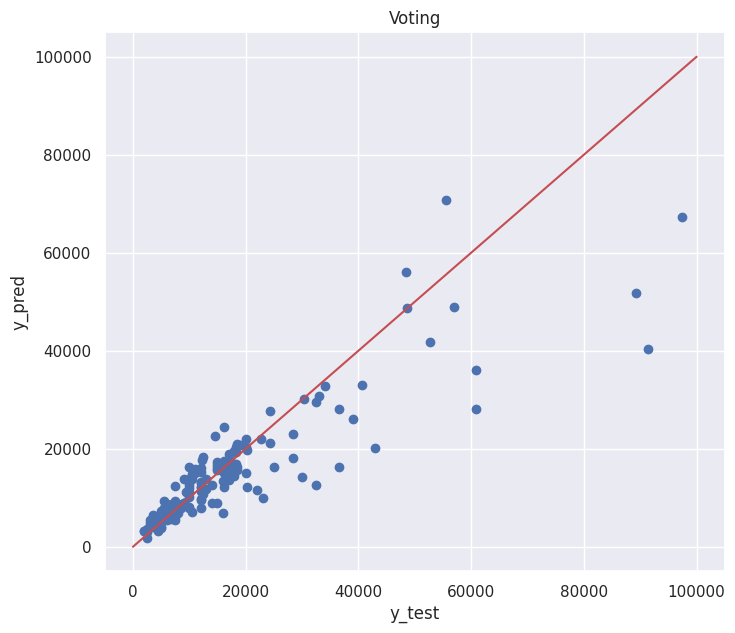

In [5018]:
scatterplots_for_pred_test(y_test, y_pred_dict)

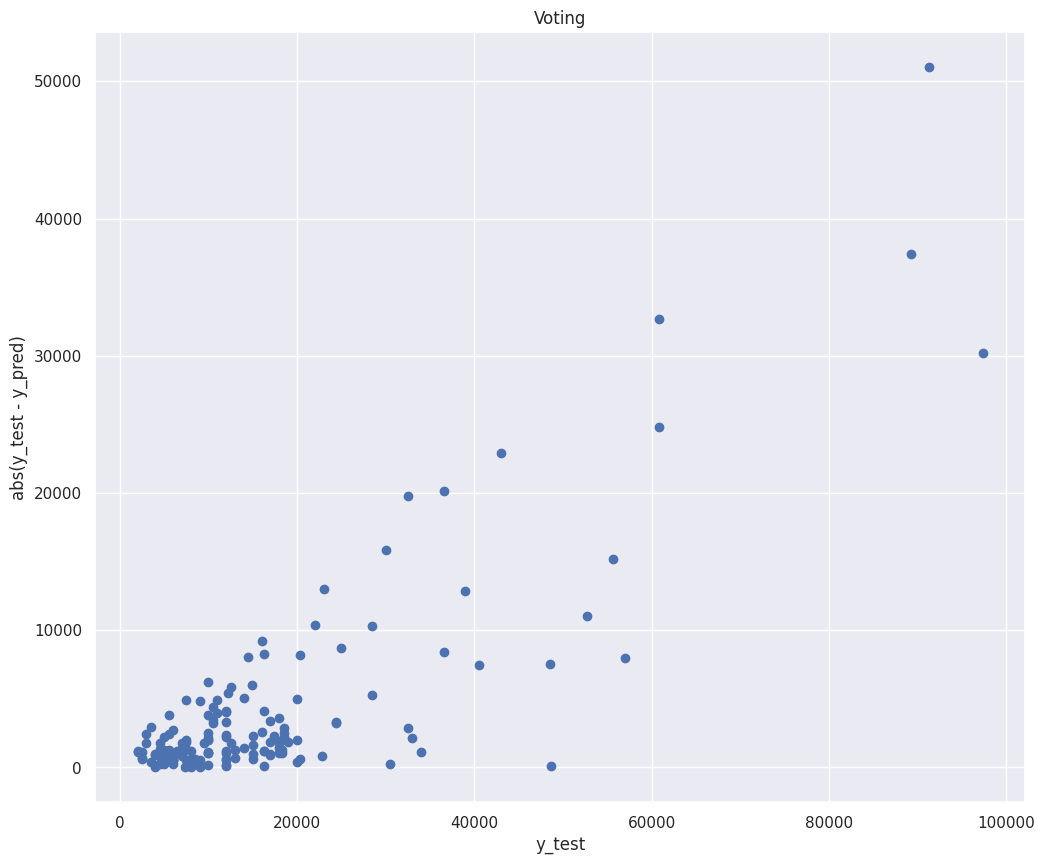

In [5019]:
error_for_pred_test(y_test, y_pred_dict)

# Helpful functions for interval models

In [5020]:
def print_x_test_with_pred_price_interval(X_test, y_test, lower_bounds, point_predictions, upper_bounds):
    test_df = X_test.copy()
    test_df['price'] = np.exp(y_test)
    test_df['pred_price_low'] = np.exp(lower_bounds)
    test_df['pred_price'] = np.exp(point_predictions)
    test_df['pred_price_up'] = np.exp(upper_bounds)
    return test_df.sample(30, random_state=1)

In [5021]:
def run_manual_test_interval(pipe, manual_test_df):
    manual_test_df_copy = manual_test_df.copy()
    predicted = pipe.predict(manual_test_df_copy)
    lower_bound, y_pred, upper_bound = predicted[:, 0], predicted[:, 1], predicted[:, 2]
    manual_test_df_copy['lower_pred_price'] = np.exp(lower_bound)
    manual_test_df_copy['pred_price'] = np.exp(y_pred)
    manual_test_df_copy['upper_pred_price'] = np.exp(upper_bound)
    return manual_test_df_copy.head(10)

In [5022]:
def show_difference_in_predicted_intervals_and_actual_price(y_test, lower_bounds, point_predictions, upper_bounds):
    y_test_sorted = y_test.sort_values()
    lower_bounds_sorted = pd.Series(lower_bounds, index=y_test.index).reindex(y_test_sorted.index)
    point_predictions_sorted = pd.Series(point_predictions, index=y_test.index).reindex(y_test_sorted.index)
    upper_bounds_sorted = pd.Series(upper_bounds, index=y_test.index).reindex(y_test_sorted.index)
    plt.figure(figsize=(20,10))
    plt.title('Prices difference')
    plt.xlabel('sorted test obserbations')
    plt.ylabel('prices')
    plt.plot(range(0, y_test_sorted.shape[0]), np.exp(y_test_sorted), c='blue', label='Actual price')
    plt.plot(range(0, y_test_sorted.shape[0]), np.exp(lower_bounds_sorted), c='yellow', label='Low limit for pred price')
    plt.plot(range(0, y_test_sorted.shape[0]), np.exp(point_predictions_sorted), c='orange', label='Pred price')
    plt.plot(range(0, y_test_sorted.shape[0]), np.exp(upper_bounds_sorted), c='red', label='Upper limit for pred price')
    plt.legend()
    plt.show()

In [5023]:
def average_diff(lower_bounds, upper_bounds):
    return (np.exp(upper_bounds) - np.exp(lower_bounds)).mean()

# Loss function for interval model

In [5024]:
from sklearn.metrics import make_scorer

def interval_accuracy(y_true, y_pred):
    y_pred_lower, y_pred_upper = y_pred[:, 0], y_pred[:, 2]
    y_pred_lower = pd.Series(y_pred_lower, index=y_true.index)
    y_pred_upper = pd.Series(y_pred_upper, index=y_true.index)
    in_interval = ((y_pred_lower < y_true) & (y_true < y_pred_upper)).sum()
    return in_interval/y_true.shape[0]

interval_accuracy_scorer = make_scorer(interval_accuracy, greater_is_better=True)

# Create Voting regressor adapted to predict interval

In [5025]:
class IntervalVotingRegressor(VotingRegressor):
    def __init__(self, estimators, weights=None, n_jobs=None, verbose=False, interval_width=0.95):
        self.interval_width = interval_width
        self.lower_quantile = (1 - self.interval_width) / 2
        self.upper_quantile = 1 - self.lower_quantile
        super().__init__(estimators=estimators, weights=weights, n_jobs=n_jobs, verbose=verbose)
    
    def fit(self, X, y):
        super().fit(X, y)
        
        y_pred = super().predict(X)
        self.residuals = y - y_pred        
        
        return self

    def predict(self, X):
        y_pred = super().predict(X)
        
        lower_bound = y_pred + np.quantile(self.residuals, self.lower_quantile)
        upper_bound = y_pred + np.quantile(self.residuals, self.upper_quantile)
        
        return np.column_stack((lower_bound, y_pred, upper_bound))

In [5026]:
"""
estimators = [
    #('lr', LinearRegression()),
    ('ls', Lasso(alpha=0.001)),
    ('et', ExtraTreesRegressor(n_estimators=500)),
    ('gb', GradientBoostingRegressor(max_depth=5)),
    ('xgb', XGBRegressor(max_depth=2))
]

interval_voter = IntervalVotingRegressor(estimators=estimators, interval_width=0.9)

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', interval_voter)
])

param_grid = [{
    'model__gb__n_estimators': [100, 200],
    'model__gb__learning_rate': [0.1, 0.5],
    'model__xgb__n_estimators': [100, 200],
    'model__xgb__learning_rate': [0.5, 0.1],
}]

grid_pipeline = GridSearchCV(pipe, param_grid, scoring=interval_accuracy_scorer, cv=5, verbose=3)

grid_pipeline.fit(X_train, y_train)

prediction = grid_pipeline.best_estimator_.predict(X_test)
lower_bound, y_pred, upper_bound = prediction[:, 0], prediction[:, 1], prediction[:, 2]
print("Best parameters:", grid_pipeline.best_params_)
print("Best cross-validation score:", grid_pipeline.best_score_)
"""

estimators = [
    ('lr', LinearRegression()),
    ('ls', Lasso(alpha=0.005)),
    ('et', ExtraTreesRegressor(n_estimators=500)),
    ('gb', GradientBoostingRegressor(n_estimators=75)),
    ('xgb', XGBRegressor(n_estimators=75))
]

interval_voter = IntervalVotingRegressor(estimators=estimators, weights=[1,1,1,1,1], interval_width=0.8)

pipe = Pipeline([
    ('col_tnf', col_tnf),
    ('model', interval_voter)
])

pipe.fit(X_train, y_train)

prediction = pipe.predict(X_test)
lower_bound, y_pred, upper_bound = prediction[:, 0], prediction[:, 1], prediction[:, 2]

# Results for Interval Voting Regressor

In [5027]:
print('Interval accuracy: ', interval_accuracy(y_test, prediction))

Interval accuracy:  0.643312101910828


In [5028]:
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))

R2 score 0.8379841769289698
MAE 0.23367744697514248
MSE 0.09926067816759358


In [5029]:
average_diff(lower_bound, upper_bound)

6558.683824090725

In [5030]:
average_diff(lower_bound, upper_bound)/np.exp(y_test).mean()

0.3995674685552516

In [5031]:
average_diff(lower_bound, upper_bound)/np.exp(y_test).median()

0.546556940861976

In [5032]:
average_diff(lower_bound, upper_bound)/np.exp(y_test).std()

0.40642881159868127

In [5033]:
run_manual_test_interval(pipe, manual_test_df)

,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Місто,Район,Підключене резервне живлення,Працює ліфт,lower_pred_price,pred_price,upper_pred_price
1,14,16,38.0,10.0,1 кімната,З меблями,Косметичний ремонт,Одеса,Київський (Одеса),0,0,5208.018476,6621.863059,8253.898325
2,20,25,48.0,20.0,2 кімнати,З меблями,Євроремонт,Одеса,Приморський (Одеса),1,0,10682.289758,13582.259792,16929.765889
3,2,5,20.0,7.0,1 кімната,З меблями,Косметичний ремонт,Запоріжжя,Невідомо,0,0,3181.472323,4045.161159,5042.138234
4,30,30,250.0,25.0,5+ кімнат,З меблями,Авторський проект,Київ,Печерський (Київ),1,1,60294.225057,76662.573966,95556.958090
5,8,9,38.0,10.0,1 кімната,З меблями,Євроремонт,Львів,Сихівський (Львів),0,0,10728.245637,13640.691523,17002.598801
6,2,5,41.0,20.0,1 кімната,З меблями,Авторський проект,Одеса,Київський (Одеса),0,0,9360.005443,11901.008910,14834.151148
7,1,9,46.0,9.0,2 кімнати,З меблями,Житловий стан,Миколаїв,Інгульський (Миколаїв),0,0,5056.106981,6428.711457,8013.142260


In [5034]:
print_x_test_with_pred_price_interval(X_test, y_test, lower_bound, y_pred, upper_bound)

,Поверх,Поверховість,Загальна площа,Площа кухні,Кількість кімнат,Меблювання,Ремонт,Місто,Район,Підключене резервне живлення,Працює ліфт,price,pred_price_low,pred_price,pred_price_up
119,19,24,45.000000,6.000000,1 кімната,З меблями,Євроремонт,Київ,Солом'янський (Київ),0,0,19999.992188,11257.272215,14313.335365,17841.023551
120,11,18,150.000000,18.000000,3 кімнати,З меблями,Авторський проект,Київ,Печерський (Київ),0,0,97388.968750,46901.019804,59633.454056,74330.813267
598,7,16,71.000000,24.000000,2 кімнати,З меблями,Авторський проект,Львів,Франківський (Львів),0,0,30433.998047,22639.623602,28785.705717,35880.278114
1265,1,4,40.000000,11.000000,1 кімната,З меблями,Євроремонт,Львів,Галицький (Львів),0,0,17448.996094,11471.694566,14585.967932,18180.849589
1124,1,5,32.000000,8.000000,1 кімната,З меблями,Житловий стан,Кам'янське,Невідомо,0,0,4999.998047,4389.894089,5581.638706,6957.298566
401,8,9,90.000000,15.000000,4 кімнати,З меблями,Косметичний ремонт,Кам'янське,Невідомо,0,1,8999.997070,10657.191430,13550.347907,16889.988948
974,1,5,42.000000,15.000000,1 кімната,З меблями,Косметичний ремонт,Костянтинівка,Невідомо,1,0,8000.000977,6968.805935,8860.659540,11044.472269
647,1,5,50.000000,8.000000,2 кімнати,З меблями,Не вказано,Ужгород,Невідомо,0,0,12000.000977,9630.225682,12244.587072,15262.408149
798,2,5,55.000000,10.000000,2 кімнати,Не вказано,Не вказано,Дніпро,Центральний (Дніпро),0,0,18000.001953,11210.531098,14253.905223,17766.946159
89,16,22,130.000000,20.000000,3 кімнати,З меблями,Авторський проект,Одеса,Приморський (Одеса),1,1,60868.027344,27215.156045,34603.378869,43131.784563


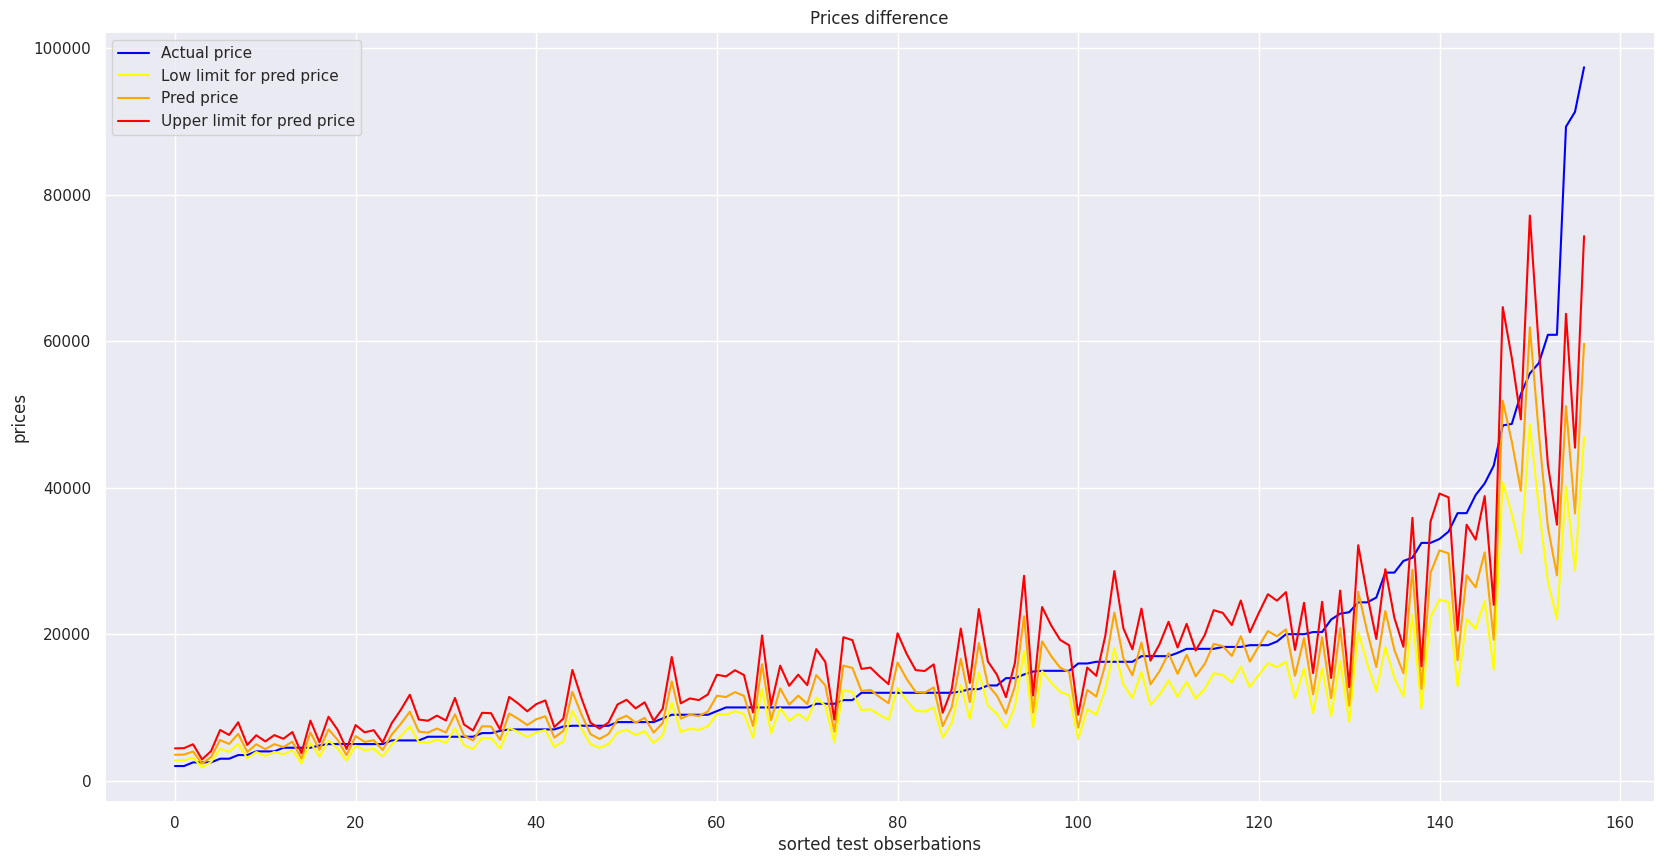

In [5035]:
show_difference_in_predicted_intervals_and_actual_price(y_test, lower_bound, y_pred, upper_bound)

# Save VotingRegression model. We are not gonna use IntervalVotingRegression model because of not very good accuracy

In [5036]:
with open('model.pkl', 'wb') as file:
    pickle.dump(pipes_dict['Voting'], file)

# Save clean dataframe

In [5037]:
with open('clean_data.pkl', 'wb') as file:
    pickle.dump(df_clean, file)